<a href="https://colab.research.google.com/github/mAbbaspour/Hyperparameter-Optimization/blob/main/lipo%20final%20schuler%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import math;

import sklearn 
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import random as rd
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sklearn
from pandas import read_csv
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFdr
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_learning_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# path = r"C:\\Users\\ahmad\\Desktop\\bace_global_cdf_rdkit.csv"
# fileX=open(path)
# dataXX=csv.reader(fileX)
# headerX=next(dataXX)
# print(os.uname())


In [34]:
from google.colab import files
uploaded = files.upload()
uploaded2 = files.upload()

Saving lipo(Lables).csv to lipo(Lables) (3).csv


Saving lipo_global_cdf_rdkit.csv to lipo_global_cdf_rdkit (2).csv


In [35]:
import io
dataY = pd.read_csv(io.BytesIO(uploaded['lipo(Lables).csv']))
print(dataY[dataY.isnull().any(axis=1)])
print(dataY.shape)
dataY = dataY.drop(1561)
print(dataY.shape)

Empty DataFrame
Columns: [smiles, lipo]
Index: []
(4200, 2)
(4199, 2)


[-1.18 3.69 3.37 ... 2.1 2.65 2.7]
      ('RDKit2DNormalized_calculated', <class 'bool'>)  \
1561                                              True   

      ('BalabanJ', <class 'numpy.float64'>)  \
1561                                  0.895   

      ('BertzCT', <class 'numpy.float64'>)  ('Chi0', <class 'numpy.float64'>)  \
1561                              0.230752                           0.031331   

      ('Chi0n', <class 'numpy.float64'>)  ('Chi0v', <class 'numpy.float64'>)  \
1561                            0.032387                            0.061726   

      ('Chi1', <class 'numpy.float64'>)  ('Chi1n', <class 'numpy.float64'>)  \
1561                           0.050799                            0.045963   

      ('Chi1v', <class 'numpy.float64'>)  ('Chi2n', <class 'numpy.float64'>)  \
1561                            0.116251                             0.04344   

      ...  ('fr_sulfonamd', <class 'numpy.float64'>)  \
1561  ...                               1.593061e-17 

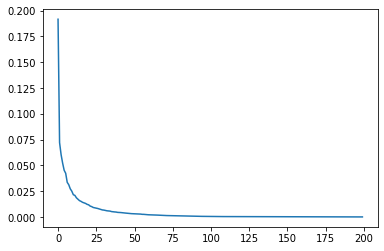

In [37]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import io

data = pd.read_csv(io.BytesIO(uploaded2['lipo_global_cdf_rdkit.csv']))

arrayY = dataY.values
Y = arrayY[1: , 1 ]
print(Y)
print(data[data.isnull().any(axis=1)])
print(len(data))
data = data.dropna()
print(len(data))
array = data.values
X = array[1:,1:]
print(X)
X_train, X_test ,Y_train , Y_test  = train_test_split(X, Y ,test_size=0.2)
scaler_data  = preprocessing.MinMaxScaler()
X_train = scaler_data.fit_transform(X_train)
X_test =  scaler_data.transform(X_test)
scaler_labels = preprocessing.MinMaxScaler()
Y_train = scaler_labels.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler_labels.transform(Y_test.reshape(-1, 1))
print(data.shape)
print(len(X_test))
pca = PCA(n_components=200)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
plt.plot(np.arange(200),pca.explained_variance_ratio_)
plt.show()

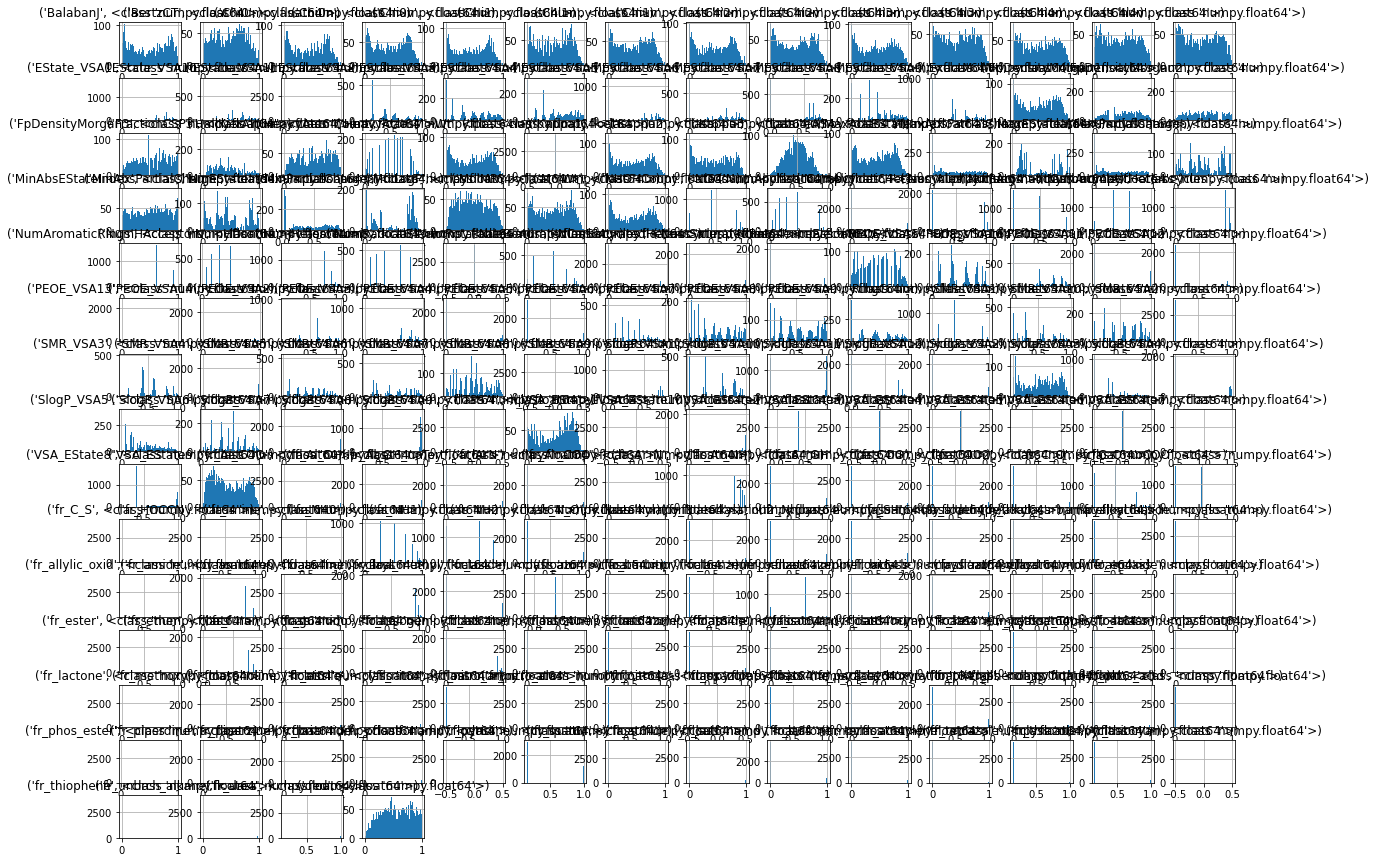

In [38]:
data.hist(bins=100, figsize=(20,15))

plt.show()

In [61]:
import pandas as pd
from sklearn import preprocessing
pca = PCA(n_components=60)
pca.fit(X_train)
X_train=pca.transform(X_train)



X_test = pca.transform(X_test)

scaler_data = preprocessing.MinMaxScaler()
X_train = scaler_data.fit_transform(X_train)
X_test = scaler_data.transform(X_test)

scaler_labels = preprocessing.MinMaxScaler()
Y_train = scaler_labels.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler_labels.transform(Y_test.reshape(-1, 1))
print(scaler_data)

MinMaxScaler()


In [62]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded2['lipo_global_cdf_rdkit.csv']))
data.head()

,"('RDKit2DNormalized_calculated', <class 'bool'>)","('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)",...,"('fr_sulfonamd', <class 'numpy.float64'>)","('fr_sulfone', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_thiazole', <class 'numpy.float64'>)","('fr_thiocyan', <class 'numpy.float64'>)","('fr_thiophene', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)"
0,True,0.165068,0.378858,0.267690,0.337793,0.353329,0.326565,0.389881,0.366088,0.409441,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.722127
1,True,0.765362,0.695748,0.776859,0.729485,0.788956,0.726874,0.648505,0.824561,0.609487,...,9.999565e-01,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.422093
2,True,0.714232,0.207465,0.161372,0.168520,0.240092,0.182951,0.183410,0.275841,0.190398,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,1.000000e+00,4.703598e-08,0.166633,0.855567
3,True,0.331822,0.569701,0.519154,0.417706,0.510189,0.519857,0.449285,0.540375,0.473398,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,1.000000e+00,4.703598e-08,0.166633,0.365929
4,True,0.864685,0.452665,0.595094,0.625074,0.578910,0.482260,0.514695,0.432820,0.672904,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.755285


In [63]:
#Y_w = Y_train.reshape(-1,1)
Y_train_new =  Y_train.astype(np.float)
Y_test_new = Y_test.astype(np.float)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
tensor_x_train = torch.tensor(X_train, dtype=torch.float).to(device) 
tensor_x_test = torch.tensor(X_test, dtype=torch.float).to(device) 

tensor_y_train = torch.tensor(Y_train_new , dtype=torch.float).to(device)
tensor_y_test= torch.tensor(Y_test_new, dtype=torch.float).to(device)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
from torch.utils.data import TensorDataset
trainset = TensorDataset(tensor_x_train, tensor_y_train) 
testset = TensorDataset(tensor_x_test,tensor_y_test)

In [65]:
%%capture
try:
    import ray
except:
    !pip install -U ray
    import ray

In [66]:
from functools import partial
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
from torchsummary import summary

from ray import tune
# a = {"a":tune.quniform(50, 200, 10) , "b": 5}
# print(type(a.get("a")))
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

In [67]:
def load_data(data_dir=None):
    return trainset, testset

In [68]:
# # Net().__init__(self , confing) 
#     config = {
#         "act1 ": tune.choice(["relu","tanh","selu"]),
#         "act2" : tune.choice(["relu","tanh","selu"]),
#         "act3" : tune.choice(["relu","tanh","selu"]),
#         "lr": tune.quniform(0.0005, 0.001, 0.0001),
#         "batch_size": tune.choice([8, 16, 32]),
#         "hidden_dim1" : tune.quniform(50, 200, 10),
#         "hidden_dim2" : tune.quniform(50, 200, 10),
#         "hidden_dim3" : tune.quniform(50, 200, 10),
#     }
#   self = { "confing": confing , "hd":}
class Net(nn.Module):
    def __init__(self , config):
        super().__init__()
        self.config = config
        self.hidden_dim1 = int(self.config.get("hidden_dim1",100))
        self.hidden_dim2 = int(self.config.get("hidden_dim2",100))

        self.linear1 = nn.Linear(60, self.hidden_dim1)
        self.linear2 = nn.Linear(self.hidden_dim1, self.hidden_dim2)
        self.linear3 = nn.Linear(self.hidden_dim2, 1)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.linear2(out)
        out = self.linear3(out)
        return out

In [69]:
model = Net({})

In [70]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [71]:
summary(model, (1,tensor_x_train.shape[1]))

count_parameters(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]           6,100
            Linear-2               [-1, 1, 100]          10,100
            Linear-3                 [-1, 1, 1]             101
Total params: 16,301
Trainable params: 16,301
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.06
----------------------------------------------------------------
+----------------+------------+
|    Modules     | Parameters |
+----------------+------------+
| linear1.weight |    6000    |
|  linear1.bias  |    100     |
| linear2.weight |   10000    |
|  linear2.bias  |    100     |
| linear3.weight |    100     |
|  linear3.bias  |     1      |
+----------------+------------+
Total Trainable Params: 16301


16301

In [72]:
def trainable_func(config, checkpoint_dir=None, data_dir=None, epochs=10):

    net = Net(config)

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    '''
    Define a loss function
    '''
    ## Classification
    # criterion = nn.CrossEntropyLoss()

    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Define an optimizer 
    optimizer = optim.Adam(net.parameters(), lr=config.get("lr",0.0003))

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    # Load data
    trainset, testset = load_data(data_dir)

    # Split the dataset into training and validation sets
    train_size = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(trainset, [train_size, len(trainset) - train_size])

    # Define data loaders (which combines a dataset and a sampler, and provides an iterable over the given dataset)
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)

    for epoch in range(epochs):  # loop over the dataset multiple times
        epoch_train_loss = 0.0
        # epoch_steps = 0
        net.train() # Prepare model for training
        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            '''
            Compute train loss without scaling to print
            ''' 
            # outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            # labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device)  
            # loss_train = criterion(outputs, labels) 
            # epoch_train_loss += loss_train.detach().item()
        # print("[%d] loss: %.3f" % (epoch + 1, epoch_train_loss / len(train_subset)))

        # Validation loss
        val_loss = 0.0
        net.eval() # Prepare model for evaluation
        for i, data in enumerate(valloader):
            with torch.no_grad():
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)

                # Inverse transform of the labels' scaler
                outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
                labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(epoch = epoch, loss=(val_loss / len(val_subset)))
    print("Finished Training")

In [73]:
def test_score(config, net, device="cpu"):
    trainset, testset = load_data()

    testloader = torch.utils.data.DataLoader(
        testset, batch_size=int(config.get("batch_size",32)), shuffle=False, num_workers=2)
    
    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Test loss
    test_loss = 0.0
    net.eval() # Prepare model for evaluation
    for i, data in enumerate(testloader):
        with torch.no_grad():
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)

            # Inverse transform of the labels' scaler
            outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

            loss = criterion(outputs, labels)
            test_loss += loss.cpu().numpy()

    return test_loss / len(testset)

In [75]:
ray.shutdown()
ray.init() # Here we use ray.init() to evaluate available_resources for Ray
print(ray.available_resources())
ray.shutdown()  # Restart Ray defensively in case the ray connection is lost. 

# Start Ray runtime with specific resources (not nessesarily all resources)
# You can change this values based on your machine resources)
ray.init(num_cpus=2, num_gpus=0) 

"""Check Ray Tune is working properly (for trainable class)"""
# from ray.tune.utils import validate_save_restore
# validate_save_restore(Trainable)
# validate_save_restore(Trainable, use_object_store=True)
# print("Success!")
""""""

{'memory': 7939741287.0, 'CPU': 2.0, 'object_store_memory': 3969870643.0, 'node:172.28.0.2': 1.0}


''

In [76]:
%%capture
try:
    import optuna
except:
    %pip install optuna
    import optuna

In [77]:
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "lr": tune.quniform(0.0005, 0.001, 0.0001),
        "batch_size": tune.choice([8, 16, 32]),
        "hidden_dim1" : tune.quniform(50, 200, 10),
        "hidden_dim2" : tune.quniform(50, 200, 10),
        "hidden_dim3" : tune.quniform(50, 200, 10),
    }

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = OptunaSearch(
        metric="loss", #or accuracy, etc.
        mode="min", #or max
        # seed = 42,
        # points_to_evaluate=[
        # {'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0}
        # ],
        )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)

    scheduler = ASHAScheduler(
        metric ="loss",
        mode="min",
        max_t=max_num_epochs,
        reduction_factor=2, 
        grace_period=4,
        brackets=5
        )
    
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="loss",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 0.5, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["loss"]))

    best_trained_model = Net(best_trial.config)
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_score_value = test_score(best_trial.config, best_trained_model, device)
    print("Best trial test set score: {}".format(test_score_value))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=50, max_num_epochs=50, gpus_per_trial=0)


2022-07-17 19:16:53,531	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-17 19:16:53 (running for 00:00:00.23)
Memory usage on this node: 1.5/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 0.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_19-16-53
Number of trials: 1/50 (1 RUNNING)


== Status ==
Current time: 2022-07-17 19:16:58 (running for 00:00:05.43)
Memory usage on this node: 1.7/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.

2022-07-17 19:30:29,900	INFO tune.py:748 -- Total run time: 816.41 seconds (816.22 seconds for the tuning loop).


Trial trainable_func_c440e6c8 reported epoch=49,loss=0.021572990455444526,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 80.0, 'hidden_dim2': 90.0, 'hidden_dim3': 110.0}. This trial completed.
== Status ==
Current time: 2022-07-17 19:30:29 (running for 00:13:36.24)
Memory usage on this node: 1.5/12.7 GiB
Using AsyncHyperBand: num_stopped=36
Bracket: Iter 32.000: -0.023548601350992154 | Iter 16.000: -0.0239617458840526 | Iter 8.000: -0.02436442999484319 | Iter 4.000: -0.025352823029367803
Bracket: Iter 32.000: -0.022740682228684618 | Iter 16.000: -0.02338346366539966 | Iter 8.000: -0.023880060690609994
Bracket: Iter 32.000: -0.026332018672121083 | Iter 16.000: -0.024142528719060398
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_19-16-53
Number of trials: 50/50 (50 TERMINAT

In [78]:
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.suggest.optuna import OptunaSearch  
from ray.tune.suggest.dragonfly import DragonflySearch
from ray.tune.suggest.bayesopt import BayesOptSearch
from ray.tune.schedulers.hb_bohb import HyperBandForBOHB
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.schedulers import MedianStoppingRule
from ray.tune.schedulers import PopulationBasedTraining
from ray.tune.suggest.bohb import TuneBOHB
from ray.tune.suggest.basic_variant import BasicVariantGenerator
from ray.tune.suggest import ConcurrencyLimiter

In [48]:
training_iteration = 50 #max_num_epochs

## ASHA
scheduler = AsyncHyperBandScheduler(
    time_attr="training_iteration",
    max_t=training_iteration,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    reduction_factor=2, 
    grace_period=4,
    brackets=5,
    )

## BOHB
scheduler = HyperBandForBOHB(
    time_attr="training_iteration",
    max_t=training_iteration, 
    reduction_factor=8, 
    stop_last_trials=True,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    )

## Median
scheduler = MedianStoppingRule(
    time_attr="training_iteration",
    grace_period=10,
    min_samples_required=10,
    hard_stop = True,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    )

## PBT
scheduler = PopulationBasedTraining(
    time_attr="training_iteration",
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    perturbation_interval=10,  # every 10 `time_attr` units
                            # (training_iterations in this case)
    # hyperparam_mutations={
    #     "lr": [8e-3, 7e-3, 6e-3, 5e-3, 4e-3],
    #     "dropout": tune.quniform(0.0, 0.4, 0.05),
    #     "dropout1": tune.quniform(0.0, 0.4, 0.05),
    #     "dropout2": tune.quniform(0.0, 0.4, 0.05),
    #     "max_norm_val":tune.choice([2.5, 3, 3.5, 4]),
    #     }
    )


In [80]:
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "lr": tune.quniform(0.0005, 0.001, 0.0001),
        "batch_size": tune.choice([8, 16, 32]),
        "hidden_dim1" : tune.quniform(50, 200, 10),
        "hidden_dim2" : tune.quniform(50, 200, 10),
        "hidden_dim3" : tune.quniform(50, 200, 10),
    }

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = OptunaSearch(
        metric="loss", #or accuracy, etc.
        mode="min", #or max
        # seed = 42,
        # points_to_evaluate=[
        # {'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0}
        # ],
        )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)
    training_iteration = 50
    scheduler = AsyncHyperBandScheduler(
    time_attr="training_iteration",
    max_t=training_iteration,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    reduction_factor=2, 
    grace_period=4,
    brackets=5,
    )
    
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="loss",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 0.5, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["loss"]))

    best_trained_model = Net(best_trial.config)
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_score_value = test_score(best_trial.config, best_trained_model, device)
    print("Best trial test set score: {}".format(test_score_value))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=50, max_num_epochs=50, gpus_per_trial=0)


2022-07-17 20:01:55,607	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-17 20:01:57 (running for 00:00:02.09)
Memory usage on this node: 2.3/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 0.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-01-55
Number of trials: 1/50 (1 RUNNING)


== Status ==
Current time: 2022-07-17 20:02:02 (running for 00:00:07.38)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.

2022-07-17 20:15:53,657	INFO tune.py:748 -- Total run time: 838.11 seconds (837.89 seconds for the tuning loop).


Trial trainable_func_0a50d80c reported epoch=49,loss=0.021349086451402426,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}. This trial completed.
== Status ==
Current time: 2022-07-17 20:15:53 (running for 00:13:57.92)
Memory usage on this node: 2.2/12.7 GiB
Using AsyncHyperBand: num_stopped=37
Bracket: Iter 32.000: -0.023339140024195536 | Iter 16.000: -0.024150511381762003 | Iter 8.000: -0.02464007228080333 | Iter 4.000: -0.025812149856654705
Bracket: Iter 32.000: -0.0232455194504504 | Iter 16.000: -0.02447038542227857 | Iter 8.000: -0.024674874663536746
Bracket: Iter 32.000: -0.023302965123331063 | Iter 16.000: -0.023460358399671248
Bracket: Iter 32.000: -0.023637739220912002
Bracket: 
Resources requested: 0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-01-55
Number of trials: 

In [81]:
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "lr": tune.quniform(0.0005, 0.001, 0.0001),
        "batch_size": tune.choice([8, 16, 32]),
        "hidden_dim1" : tune.quniform(50, 200, 10),
        "hidden_dim2" : tune.quniform(50, 200, 10),
        "hidden_dim3" : tune.quniform(50, 200, 10),
    }

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = OptunaSearch(
        metric="loss", #or accuracy, etc.
        mode="min", #or max
        # seed = 42,
        # points_to_evaluate=[
        # {'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0}
        # ],
        )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)
    training_iteration = 50
    scheduler = HyperBandForBOHB(
    time_attr="training_iteration",
    max_t=training_iteration, 
    reduction_factor=8, 
    stop_last_trials=True,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    )
    
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="loss",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 0.5, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["loss"]))

    best_trained_model = Net(best_trial.config)
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_score_value = test_score(best_trial.config, best_trained_model, device)
    print("Best trial test set score: {}".format(test_score_value))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=50, max_num_epochs=50, gpus_per_trial=0)


2022-07-17 20:20:48,229	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-17 20:20:49 (running for 00:00:01.29)
Memory usage on this node: 2.3/12.7 GiB
Using HyperBand: num_stopped=0 total_brackets=2
Round #0:
  Bracket(Max Size (n)=12, Milestone (r)=6, completed=0.0%): {RUNNING: 1} 
Resources requested: 0.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-20-48
Number of trials: 1/50 (1 RUNNING)


== Status ==
Current time: 2022-07-17 20:20:54 (running for 00:00:06.65)
Memory usage on this node: 2.5/12.7 GiB
Using HyperBand: num_stopped=0 total_brackets=2
Round #0:
  Bracket(Max Size (n)=12, Milestone (r)=6, completed=0.0%): {PENDING: 1, RUNNING: 4} 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-20-48
Number of trials: 5/50 (1 PENDING, 4 RUNNING)


== Status ==
Current time: 2022-07-17 20:20:59 (running for 00:00:11.66)
Memory usage on this node: 2.7/12.7 Gi

(func pid=59907) 2022-07-17 20:21:52,975	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-20-48/trainable_func_f1f908b4_1_act1=tanh,act2=relu,act3=tanh,batch_size=16,hidden_dim1=180.0000,hidden_dim2=70.0000,hidden_dim3=100.000_2022-07-17_20-20-49/checkpoint_tmp318414/./
(func pid=59907) 2022-07-17 20:21:52,975	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 16.235421895980835, '_episodes_total': None}


Trial trainable_func_f1f908b4 reported epoch=0,loss=0.020570533505240563,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 70.0, 'hidden_dim3': 100.0}.
== Status ==
Current time: 2022-07-17 20:21:56 (running for 00:01:08.52)
Memory usage on this node: 2.6/12.7 GiB
Using HyperBand: num_stopped=8 total_brackets=3
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=38.8%): {RUNNING: 2, TERMINATED: 8} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=0.0%): {PENDING: 1, RUNNING: 2} 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-20-48
Number of trials: 13/50 (1 PENDING, 4 RUNNING, 8 TERMINATED)


Trial trainable_func_f1f908b4 reported epoch=3,loss=0.0210156282335411,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0005, 'bat

(func pid=61297) 2022-07-17 20:22:03,984	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-20-48/trainable_func_03fd7e14_8_act1=relu,act2=relu,act3=selu,batch_size=8,hidden_dim1=100.0000,hidden_dim2=110.0000,hidden_dim3=150.000_2022-07-17_20-21-25/checkpoint_tmp62845d/./
(func pid=61297) 2022-07-17 20:22:03,985	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 27.394859313964844, '_episodes_total': None}


Trial trainable_func_189248e6 reported epoch=0,loss=0.02953161980647783,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 200.0, 'hidden_dim3': 60.0}.
Trial trainable_func_f1f908b4 reported epoch=6,loss=0.022252063007533615,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 70.0, 'hidden_dim3': 100.0}.
Trial trainable_func_03fd7e14 reported epoch=0,loss=0.03253192321414126,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 110.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-17 20:22:08 (running for 00:01:20.38)
Memory usage on this node: 3.0/12.7 GiB
Using HyperBand: num_stopped=8 total_brackets=3
Round #0:
  Bracket(Max Size (n)=2, Milestone 

(func pid=61298) 2022-07-17 20:28:40,586	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-20-48/trainable_func_5c7111f0_15_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=90.0000,hidden_dim2=80.0000,hidden_dim3=190.000_2022-07-17_20-24-56/checkpoint_tmp3508c0/./
(func pid=61298) 2022-07-17 20:28:40,586	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 10.462080955505371, '_episodes_total': None}


Trial trainable_func_5c7111f0 reported epoch=0,loss=0.024584454519903858,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 90.0, 'hidden_dim2': 80.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-17 20:28:44 (running for 00:07:56.32)
Memory usage on this node: 2.6/12.7 GiB
Using HyperBand: num_stopped=16 total_brackets=6
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 10} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 4} 
Round #1:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=40.0%): {RUNNING: 2, TERMINATED: 8} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=0.0%): {PENDING: 1, RUNNING: 1} 
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-20-48
Number of trials: 26/50 (1 PENDING, 3 RUNNING, 22 TERMI

(func pid=68388) 2022-07-17 20:28:51,412	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-20-48/trainable_func_cf2debaa_22_act1=relu,act2=relu,act3=selu,batch_size=8,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=60.000_2022-07-17_20-27-00/checkpoint_tmp153ddb/./
(func pid=68388) 2022-07-17 20:28:51,412	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 45.13121843338013, '_episodes_total': None}


Trial trainable_func_5c7111f0 reported epoch=10,loss=0.02383606444564706,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 90.0, 'hidden_dim2': 80.0, 'hidden_dim3': 190.0}.
Trial trainable_func_0b85bd30 reported epoch=0,loss=0.03466004755949387,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 160.0, 'hidden_dim3': 110.0}.
== Status ==
Current time: 2022-07-17 20:28:55 (running for 00:08:07.36)
Memory usage on this node: 2.9/12.7 GiB
Using HyperBand: num_stopped=16 total_brackets=6
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 10} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 4} 
Round #1:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=45.0%): {RUNNING: 2, TERMINATED: 8} 
  Bracket(Max Size (n)=3, Milesto

(func pid=68615) 2022-07-17 20:33:05,558	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-20-48/trainable_func_68860530_29_act1=tanh,act2=relu,act3=selu,batch_size=16,hidden_dim1=50.0000,hidden_dim2=160.0000,hidden_dim3=110.00_2022-07-17_20-31-27/checkpoint_tmp53f35e/./
(func pid=68615) 2022-07-17 20:33:05,559	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 17.523025512695312, '_episodes_total': None}


Trial trainable_func_68860530 reported epoch=0,loss=0.02188661975318854,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 50.0, 'hidden_dim2': 160.0, 'hidden_dim3': 110.0}.
== Status ==
Current time: 2022-07-17 20:33:10 (running for 00:12:22.76)
Memory usage on this node: 2.6/12.7 GiB
Using HyperBand: num_stopped=24 total_brackets=9
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 10} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 4} 
Round #1:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 10} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 3} 
Round #2:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=39.4%): {RUNNING: 2, TERMINATED: 8} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=0.0%): {PENDING: 1, RUNNING: 2} 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.

(func pid=74429) 2022-07-17 20:33:16,130	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-20-48/trainable_func_95a8de70_36_act1=tanh,act2=relu,act3=selu,batch_size=8,hidden_dim1=60.0000,hidden_dim2=100.0000,hidden_dim3=150.000_2022-07-17_20-32-41/checkpoint_tmp01a804/./
(func pid=74429) 2022-07-17 20:33:16,130	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 23.920514822006226, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:33:17 (running for 00:12:28.85)
Memory usage on this node: 2.8/12.7 GiB
Using HyperBand: num_stopped=24 total_brackets=9
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 10} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 4} 
Round #1:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 10} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 3} 
Round #2:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=41.2%): {RUNNING: 2, TERMINATED: 8} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=0.0%): {PENDING: 1, RUNNING: 2} 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-20-48
Number of trials: 40/50 (1 PENDING, 4 RUNNING, 35 TERMINATED)


Trial trainable_func_68860530 reported epoch=6,loss=0.02223828558016501,should_checkpoint=True

(func pid=74429) 2022-07-17 20:37:21,653	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-20-48/trainable_func_1e652aa2_45_act1=selu,act2=relu,act3=relu,batch_size=16,hidden_dim1=160.0000,hidden_dim2=140.0000,hidden_dim3=120.0_2022-07-17_20-36-37/checkpoint_tmpe12774/./
(func pid=74429) 2022-07-17 20:37:21,653	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 18.928762912750244, '_episodes_total': None}


Trial trainable_func_1e652aa2 reported epoch=0,loss=0.020638547758383047,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 160.0, 'hidden_dim2': 140.0, 'hidden_dim3': 120.0}.
== Status ==
Current time: 2022-07-17 20:37:25 (running for 00:16:37.24)
Memory usage on this node: 2.6/12.7 GiB
Using HyperBand: num_stopped=32 total_brackets=11
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 10} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 4} 
Round #1:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 10} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 3} 
Round #2:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 10} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 3} 
Round #3:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=

(func pid=80502) 2022-07-17 20:37:27,349	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-20-48/trainable_func_335d9228_49_act1=selu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=160.0000,hidden_dim2=140.0000,hidden_dim3=130.0_2022-07-17_20-37-00/checkpoint_tmpd0e67a/./
(func pid=80502) 2022-07-17 20:37:27,350	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 14.482337713241577, '_episodes_total': None}


Trial trainable_func_1e652aa2 reported epoch=4,loss=0.02155275908608033,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 160.0, 'hidden_dim2': 140.0, 'hidden_dim3': 120.0}.
Trial trainable_func_335d9228 reported epoch=0,loss=0.025149310754219577,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 160.0, 'hidden_dim2': 140.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-17 20:37:31 (running for 00:16:43.16)
Memory usage on this node: 2.7/12.7 GiB
Using HyperBand: num_stopped=32 total_brackets=11
Round #0:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 10} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=100.0%): {TERMINATED: 4} 
Round #1:
  Bracket(Max Size (n)=2, Milestone (r)=44, completed=100.0%): {TERMINATED: 10} 
  Bracket(Max Size (n)=3, Milestone (r)=50, completed=10

2022-07-17 20:38:20,751	INFO tune.py:748 -- Total run time: 1052.56 seconds (1052.27 seconds for the tuning loop).


Best trial config: {'act1 ': 'selu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 160.0, 'hidden_dim2': 140.0, 'hidden_dim3': 120.0}
Best trial final validation score: 0.020094358627956437


TypeError: ignored

In [82]:
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "lr": tune.quniform(0.0005, 0.001, 0.0001),
        "batch_size": tune.choice([8, 16, 32]),
        "hidden_dim1" : tune.quniform(50, 200, 10),
        "hidden_dim2" : tune.quniform(50, 200, 10),
        "hidden_dim3" : tune.quniform(50, 200, 10),
    }

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = OptunaSearch(
        metric="loss", #or accuracy, etc.
        mode="min", #or max
        # seed = 42,
        # points_to_evaluate=[
        # {'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0}
        # ],
        )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)
    training_iteration = 50
    scheduler = MedianStoppingRule(
    time_attr="training_iteration",
    grace_period=10,
    min_samples_required=10,
    hard_stop = True,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    )
    
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="loss",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 0.5, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["loss"]))

    best_trained_model = Net(best_trial.config)
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_score_value = test_score(best_trial.config, best_trained_model, device)
    print("Best trial test set score: {}".format(test_score_value))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=50, max_num_epochs=50, gpus_per_trial=0)


2022-07-17 20:38:52,808	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-17 20:38:53 (running for 00:00:00.20)
Memory usage on this node: 2.3/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 0.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 1/50 (1 RUNNING)


== Status ==
Current time: 2022-07-17 20:38:58 (running for 00:00:05.41)
Memory usage on this node: 2.6/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 5/50 (1 PENDING, 4 RUNNING)


Trial trainable_func_788d2304 reported epoch=0,loss=0.038573482199013145,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-17 20:39:03

(func pid=82128) 2022-07-17 20:40:29,274	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp33aff2/./
(func pid=82128) 2022-07-17 20:40:29,275	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 59.8616247177124, '_episodes_total': None}


Trial trainable_func_9888160a reported epoch=7,loss=0.02577551859525006,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 120.0, 'hidden_dim3': 180.0}.
Trial trainable_func_a1756a10 reported epoch=2,loss=0.023535566073582453,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_a97ff4dc reported epoch=2,loss=0.025511778225380873,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:40:34 (running for 00:01:41.36)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 

(func pid=82128) 2022-07-17 20:40:35,373	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp329799/./
(func pid=82128) 2022-07-17 20:40:35,373	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 65.15350389480591, '_episodes_total': None}


Trial trainable_func_9888160a reported epoch=9,loss=0.026173146065129445,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 120.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:40:36,424	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp617b80/./
(func pid=82127) 2022-07-17 20:40:36,424	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 15.845367431640625, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=3,loss=0.03344225127297825,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_788d2304 reported epoch=0,loss=0.025613753267622514,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.


(func pid=82127) 2022-07-17 20:40:38,967	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp94f5f5/./
(func pid=82127) 2022-07-17 20:40:38,968	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 17.59214973449707, '_episodes_total': None}


Trial trainable_func_a97ff4dc reported epoch=4,loss=0.025166013214719462,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:40:40 (running for 00:01:47.36)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_786eb20c reported epoch=0,loss=0.022330772096655873,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82128) 2022-07-17 20:40:41,073	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp5c529d/./
(func pid=82128) 2022-07-17 20:40:41,073	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 70.1521863937378, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:40:41,870	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmpf59e92/./
(func pid=82127) 2022-07-17 20:40:41,871	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_tota

Trial trainable_func_a1756a10 reported epoch=4,loss=0.023888696791606344,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_788d2304 reported epoch=0,loss=0.02306087058221216,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.


(func pid=82127) 2022-07-17 20:40:44,438	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp87cc6a/./
(func pid=82127) 2022-07-17 20:40:44,438	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 21.156810998916626, '_episodes_total': None}


Trial trainable_func_a97ff4dc reported epoch=6,loss=0.02435515002668635,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:40:45 (running for 00:01:52.83)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_786eb20c reported epoch=0,loss=0.022884457198767468,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82127) 2022-07-17 20:40:46,949	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp83e5c1/./
(func pid=82127) 2022-07-17 20:40:46,949	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 23.042328119277954, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:40:47,570	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp1f5390/./
(func pid=82128) 2022-07-17 20:40:47,570	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_to

Trial trainable_func_a1756a10 reported epoch=5,loss=0.023826259296301423,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:40:49,139	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmpf53598/./
(func pid=82127) 2022-07-17 20:40:49,139	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 24.52483296394348, '_episodes_total': None}


Trial trainable_func_788d2304 reported epoch=0,loss=0.023573272858804638,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.
== Status ==
Current time: 2022-07-17 20:40:51 (running for 00:01:58.25)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_a97ff4dc reported epoch=8,loss=0.024650517546123213,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.


(func pid=82127) 2022-07-17 20:40:51,809	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp57f7b7/./
(func pid=82127) 2022-07-17 20:40:51,809	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 26.42951798439026, '_episodes_total': None}


Trial trainable_func_786eb20c reported epoch=0,loss=0.020938077354499648,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.
Trial trainable_func_a1756a10 reported epoch=6,loss=0.02373470769544455,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:40:54,092	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp29312f/./
(func pid=82128) 2022-07-17 20:40:54,092	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 81.49109959602356, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:40:55,031	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp585189/./
(func pid=82127) 2022-07-17 20:40:55,031	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:40:56 (running for 00:02:03.40)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=82190) 2022-07-17 20:40:56,237	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp2be3f0/./
(func pid=82190) 2022-07-17 20:40:56,238	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 17.344401597976685, '_episodes_total': None}


Trial trainable_func_788d2304 reported epoch=0,loss=0.02436278950308053,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.
Trial trainable_func_7893ad5a reported epoch=0,loss=0.02517897686149926,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.


(func pid=82127) 2022-07-17 20:40:58,217	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp4ab72f/./
(func pid=82127) 2022-07-17 20:40:58,217	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 30.74360203742981, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:40:59,296	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmpf1802c/./
(func pid=82190) 2022-07-17 20:40:59,296	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_tot

Trial trainable_func_786eb20c reported epoch=0,loss=0.02419269484995836,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.
Trial trainable_func_a1756a10 reported epoch=7,loss=0.02455153050723695,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:41:00,761	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpd71416/./
(func pid=82128) 2022-07-17 20:41:00,761	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 87.50644636154175, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:41:01 (running for 00:02:08.80)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=82127) 2022-07-17 20:41:01,627	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmpcc55f4/./
(func pid=82127) 2022-07-17 20:41:01,627	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 32.92384886741638, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:41:02,484	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp56354d/./
(func pid=82190) 2022-07-17 20:41:02,484	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_tot

Trial trainable_func_788d2304 reported epoch=0,loss=0.020331309119517728,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.
Trial trainable_func_7893ad5a reported epoch=0,loss=0.024503161302416546,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.


(func pid=82127) 2022-07-17 20:41:04,606	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp2b01ad/./
(func pid=82127) 2022-07-17 20:41:04,606	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 35.04976224899292, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:41:05,518	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp9025ef/./
(func pid=82190) 2022-07-17 20:41:05,518	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:41:06 (running for 00:02:13.92)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_786eb20c reported epoch=0,loss=0.024515407671444354,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82127) 2022-07-17 20:41:07,422	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp300514/./
(func pid=82127) 2022-07-17 20:41:07,423	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 37.16060757637024, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=8,loss=0.027551042363357148,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:41:07,908	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmpe31249/./
(func pid=82190) 2022-07-17 20:41:07,908	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 24.63106060028076, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:41:08,876	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp3db214/./
(func pid=82128) 2022-07-17 20:41:08,877	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_tot

Trial trainable_func_788d2304 reported epoch=0,loss=0.025603128231004333,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.
Trial trainable_func_7893ad5a reported epoch=0,loss=0.02150699521132257,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.


(func pid=82127) 2022-07-17 20:41:10,050	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmpbb7bb8/./
(func pid=82127) 2022-07-17 20:41:10,050	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 38.78209352493286, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:41:10,922	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmpd0d748/./
(func pid=82190) 2022-07-17 20:41:10,923	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:41:12 (running for 00:02:19.73)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=82127) 2022-07-17 20:41:12,570	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp860d24/./
(func pid=82127) 2022-07-17 20:41:12,570	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 40.435107946395874, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:41:13,379	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmpf07493/./
(func pid=82190) 2022-07-17 20:41:13,379	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_to

Trial trainable_func_a1756a10 reported epoch=9,loss=0.023054409832898942,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_788d2304 reported epoch=0,loss=0.023139734030204265,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.024214041042589413,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82180) 2022-07-17 20:41:14,521	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpbd2b46/./
(func pid=82180) 2022-07-17 20:41:14,521	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 68.11685037612915, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:41:14,910	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp571199/./
(func pid=82128) 2022-07-17 20:41:14,911	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:41:18 (running for 00:02:25.22)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_7893ad5a reported epoch=0,loss=0.023281025103153778,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.


(func pid=82127) 2022-07-17 20:41:18,058	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmpe3cc09/./
(func pid=82127) 2022-07-17 20:41:18,070	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 44.00551986694336, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:41:18,925	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp528c00/./
(func pid=82190) 2022-07-17 20:41:18,926	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_tot

Trial trainable_func_789c7ade reported epoch=0,loss=0.02422045983805438,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.025536999539739102,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82180) 2022-07-17 20:41:19,814	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpf7dc43/./
(func pid=82180) 2022-07-17 20:41:19,815	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 72.68224358558655, '_episodes_total': None}


Trial trainable_func_788d2304 reported epoch=0,loss=0.02315838037177695,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.


(func pid=82128) 2022-07-17 20:41:20,307	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpd7694b/./
(func pid=82128) 2022-07-17 20:41:20,307	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 103.62143039703369, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:41:20,842	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp09008f/./
(func pid=82190) 2022-07-17 20:41:20,843	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_to

== Status ==
Current time: 2022-07-17 20:41:23 (running for 00:02:30.59)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=82190) 2022-07-17 20:41:23,423	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp7ec2eb/./
(func pid=82190) 2022-07-17 20:41:23,423	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 34.175801038742065, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:41:24,360	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmpceeb7f/./
(func pid=82127) 2022-07-17 20:41:24,360	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_to

Trial trainable_func_789c7ade reported epoch=0,loss=0.023935976044886478,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.024651671199955268,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82180) 2022-07-17 20:41:25,434	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp24f72c/./
(func pid=82180) 2022-07-17 20:41:25,434	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 77.72617483139038, '_episodes_total': None}


Trial trainable_func_788d2304 reported epoch=0,loss=0.022779217735260156,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.
Trial trainable_func_7893ad5a reported epoch=0,loss=0.026045806518896847,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.


(func pid=82128) 2022-07-17 20:41:25,891	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp90c503/./
(func pid=82128) 2022-07-17 20:41:25,891	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 108.62183141708374, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:41:26,613	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp9041e9/./
(func pid=82127) 2022-07-17 20:41:26,613	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_to

== Status ==
Current time: 2022-07-17 20:41:29 (running for 00:02:36.72)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)




(func pid=82127) 2022-07-17 20:41:30,233	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp1712a0/./
(func pid=82127) 2022-07-17 20:41:30,234	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 51.660327672958374, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:41:30,938	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp7e172a/./
(func pid=82190) 2022-07-17 20:41:30,938	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_to

Trial trainable_func_788d2304 reported epoch=0,loss=0.024916860729115385,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.
Trial trainable_func_7893ad5a reported epoch=0,loss=0.024214663180774598,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.023593462658908874,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82127) 2022-07-17 20:41:32,766	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp6a7ee8/./
(func pid=82127) 2022-07-17 20:41:32,766	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 53.54871606826782, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:41:33,098	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp1b72bb/./
(func pid=82190) 2022-07-17 20:41:33,098	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_tot

Trial trainable_func_789c7ade reported epoch=0,loss=0.02328532461908118,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82128) 2022-07-17 20:41:33,678	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp401f65/./
(func pid=82128) 2022-07-17 20:41:33,679	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 115.49668145179749, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:41:34,191	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp8c8f4c/./
(func pid=82180) 2022-07-17 20:41:34,191	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_to

== Status ==
Current time: 2022-07-17 20:41:34 (running for 00:02:42.03)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=82127) 2022-07-17 20:41:34,862	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp846f46/./
(func pid=82127) 2022-07-17 20:41:34,862	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 54.548370599746704, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:41:35,536	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp4b203d/./
(func pid=82190) 2022-07-17 20:41:35,536	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_to

Trial trainable_func_786eb20c reported epoch=0,loss=0.022614246237374652,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82190) 2022-07-17 20:41:38,139	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp701958/./
(func pid=82190) 2022-07-17 20:41:38,139	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 43.22302794456482, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:41:38,709	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpad8529/./
(func pid=82128) 2022-07-17 20:41:38,709	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_tot

Trial trainable_func_788d2304 reported epoch=0,loss=0.0270460878117919,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.


(func pid=82127) 2022-07-17 20:41:39,742	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmpcfe9d2/./
(func pid=82127) 2022-07-17 20:41:39,742	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 58.15636420249939, '_episodes_total': None}


Trial trainable_func_7893ad5a reported epoch=0,loss=0.021673700194330812,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.
== Status ==
Current time: 2022-07-17 20:41:39 (running for 00:02:47.15)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_789c7ade reported epoch=0,loss=0.021981127206320384,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82190) 2022-07-17 20:41:40,324	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp1a9157/./
(func pid=82190) 2022-07-17 20:41:40,324	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 45.009578704833984, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:41:41,058	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp16ce05/./
(func pid=82180) 2022-07-17 20:41:41,058	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_to

Trial trainable_func_786eb20c reported epoch=0,loss=0.024845896691189966,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.
Trial trainable_func_788d2304 reported epoch=0,loss=0.021602882622300226,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.


(func pid=82128) 2022-07-17 20:41:44,256	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpa035ea/./
(func pid=82128) 2022-07-17 20:41:44,256	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 125.08771514892578, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:41:44,803	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp311a3c/./
(func pid=82127) 2022-07-17 20:41:44,804	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_to

== Status ==
Current time: 2022-07-17 20:41:45 (running for 00:02:52.85)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_789c7ade reported epoch=0,loss=0.022908656175342733,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82127) 2022-07-17 20:41:46,922	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp474190/./
(func pid=82127) 2022-07-17 20:41:46,923	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 63.5298376083374, '_episodes_total': None}


Trial trainable_func_7893ad5a reported epoch=0,loss=0.02071135266137885,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.


(func pid=82180) 2022-07-17 20:41:47,598	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp9e66bd/./
(func pid=82180) 2022-07-17 20:41:47,598	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 96.29269456863403, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:41:48,292	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp3674ea/./
(func pid=82190) 2022-07-17 20:41:48,292	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_tot

Trial trainable_func_786eb20c reported epoch=0,loss=0.02129318878344911,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82127) 2022-07-17 20:41:49,144	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp1fdaad/./
(func pid=82127) 2022-07-17 20:41:49,144	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 65.07103848457336, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:41:49,969	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpf19570/./
(func pid=82128) 2022-07-17 20:41:49,969	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:41:50 (running for 00:02:57.94)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_788d2304 reported epoch=0,loss=0.022625514365436455,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.


(func pid=82190) 2022-07-17 20:41:50,774	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmpaeb419/./
(func pid=82190) 2022-07-17 20:41:50,774	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 51.53382110595703, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:41:51,581	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp3974a6/./
(func pid=82127) 2022-07-17 20:41:51,581	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_tot

Trial trainable_func_789c7ade reported epoch=0,loss=0.02719587615013738,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82190) 2022-07-17 20:41:53,127	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp2f7d4d/./
(func pid=82190) 2022-07-17 20:41:53,128	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 53.08950686454773, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:41:53,706	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp7f9993/./
(func pid=82180) 2022-07-17 20:41:53,709	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_tot

Trial trainable_func_7893ad5a reported epoch=0,loss=0.024718900455023035,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.02466652850029759,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82190) 2022-07-17 20:41:55,170	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp131eaf/./
(func pid=82190) 2022-07-17 20:41:55,171	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 54.4969744682312, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:41:56 (running for 00:03:03.20)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_788d2304 reported epoch=0,loss=0.023818933089197487,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.


(func pid=82128) 2022-07-17 20:41:56,034	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp37cf05/./
(func pid=82128) 2022-07-17 20:41:56,034	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 134.89161610603333, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:41:56,789	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp49bf22/./
(func pid=82127) 2022-07-17 20:41:56,789	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_to

Trial trainable_func_789c7ade reported epoch=0,loss=0.02392513913056443,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82180) 2022-07-17 20:42:00,484	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp9dad51/./
(func pid=82180) 2022-07-17 20:42:00,485	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 107.5554461479187, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:42:01 (running for 00:03:08.27)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (6 PAUSED, 4 RUNNING)


Trial trainable_func_786eb20c reported epoch=0,loss=0.02970924058277619,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.
Trial trainable_func_7893ad5a reported epoch=0,loss=0.023172715260360466,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.


(func pid=82127) 2022-07-17 20:42:01,447	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp9024e1/./
(func pid=82127) 2022-07-17 20:42:01,447	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 73.74065637588501, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:42:01,879	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp52669e/./
(func pid=82128) 2022-07-17 20:42:01,879	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_tot

Trial trainable_func_788d2304 reported epoch=0,loss=0.021514865071367056,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.


(func pid=82127) 2022-07-17 20:42:03,702	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp93f25d/./
(func pid=82127) 2022-07-17 20:42:03,703	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 75.29862833023071, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.02401844793666427,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82190) 2022-07-17 20:42:05,110	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp8d1f3f/./
(func pid=82190) 2022-07-17 20:42:05,111	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 60.754780769348145, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:42:05,729	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp61c6e0/./
(func pid=82180) 2022-07-17 20:42:05,730	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_to

== Status ==
Current time: 2022-07-17 20:42:06 (running for 00:03:13.84)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_7893ad5a reported epoch=0,loss=0.020005555907271298,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.


(func pid=82127) 2022-07-17 20:42:06,670	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp4fb2bf/./
(func pid=82127) 2022-07-17 20:42:06,671	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 77.04117751121521, '_episodes_total': None}


Trial trainable_func_786eb20c reported epoch=0,loss=0.02301842838427805,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82190) 2022-07-17 20:42:07,314	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp4dea9e/./
(func pid=82190) 2022-07-17 20:42:07,314	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 62.28024959564209, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:42:08,070	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp8c44fe/./
(func pid=82128) 2022-07-17 20:42:08,070	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_tot

Trial trainable_func_788d2304 reported epoch=0,loss=0.020967629080228842,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.


(func pid=82127) 2022-07-17 20:42:08,982	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp380c4e/./
(func pid=82127) 2022-07-17 20:42:08,984	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 78.61180830001831, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:42:09,758	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp0feac0/./
(func pid=82190) 2022-07-17 20:42:09,759	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_tot

Trial trainable_func_789c7ade reported epoch=0,loss=0.02174312508558419,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82127) 2022-07-17 20:42:11,455	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmpdc9b90/./
(func pid=82127) 2022-07-17 20:42:11,455	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 80.33476495742798, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:42:11 (running for 00:03:19.07)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)




(func pid=82180) 2022-07-17 20:42:11,903	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp69e672/./
(func pid=82180) 2022-07-17 20:42:11,903	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 117.90327525138855, '_episodes_total': None}


Trial trainable_func_786eb20c reported epoch=0,loss=0.021957643599120672,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82190) 2022-07-17 20:42:12,667	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp2b535a/./
(func pid=82190) 2022-07-17 20:42:12,667	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 65.42679786682129, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:42:13,328	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp853440/./
(func pid=82128) 2022-07-17 20:42:13,329	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_tot

Trial trainable_func_788d2304 reported epoch=0,loss=0.022563455607687816,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}.


(func pid=82127) 2022-07-17 20:42:13,971	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp146dc1/./
(func pid=82127) 2022-07-17 20:42:13,972	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 81.8596305847168, '_episodes_total': None}


Trial trainable_func_7893ad5a reported epoch=0,loss=0.025483834876475178,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.


(func pid=82190) 2022-07-17 20:42:14,891	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp330e46/./
(func pid=82190) 2022-07-17 20:42:14,891	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 66.87318801879883, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:42:16,467	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmpb78785/./
(func pid=82127) 2022-07-17 20:42:16,467	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:42:17 (running for 00:03:24.57)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 10/50 (7 PAUSED, 3 RUNNING)


Trial trainable_func_789c7ade reported epoch=0,loss=0.020858539967697466,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82190) 2022-07-17 20:42:17,402	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmpaab3fe/./
(func pid=82190) 2022-07-17 20:42:17,402	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 68.400550365448, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:42:18,215	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp0a7429/./
(func pid=82180) 2022-07-17 20:42:18,215	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total

Trial trainable_func_786eb20c reported epoch=0,loss=0.021636674260505053,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82127) 2022-07-17 20:42:18,719	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_788d2304_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=150.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-17_20-38-53/checkpoint_tmp2affea/./
(func pid=82127) 2022-07-17 20:42:18,719	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 85.26939964294434, '_episodes_total': None}


Trial trainable_func_7893ad5a reported epoch=0,loss=0.026606338876632874,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.


(func pid=82128) 2022-07-17 20:42:19,325	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpd606ae/./
(func pid=82128) 2022-07-17 20:42:19,325	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 154.95669174194336, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:42:20,051	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmpe87a0f/./
(func pid=82190) 2022-07-17 20:42:20,051	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_to

Trial trainable_func_788d2304 reported epoch=0,loss=0.02543125363651108,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}. This trial completed.
Trial trainable_func_f40da21a reported epoch=0,loss=0.035758489790759206,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 190.0, 'hidden_dim3': 190.0}.


(func pid=82190) 2022-07-17 20:42:22,358	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmpedb3c0/./
(func pid=82190) 2022-07-17 20:42:22,358	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 71.55083179473877, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.024085557567834197,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-17 20:42:23 (running for 00:03:31.12)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 11/50 (6 PAUSED, 4 RUNNING, 1 TERMINATED)


Trial trainable_func_7893ad5a reported epoch=0,loss=0.02444492342482808,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.


(func pid=82180) 2022-07-17 20:42:24,843	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp83b5dd/./
(func pid=82180) 2022-07-17 20:42:24,843	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 129.0420322418213, '_episodes_total': None}


Trial trainable_func_786eb20c reported epoch=0,loss=0.021479299248941427,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82190) 2022-07-17 20:42:25,673	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmpca830a/./
(func pid=82190) 2022-07-17 20:42:25,673	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 73.58158326148987, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:42:26,403	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpc6a917/./
(func pid=82128) 2022-07-17 20:42:26,403	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_tot

Trial trainable_func_f40da21a reported epoch=3,loss=0.02700920847092966,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 190.0, 'hidden_dim3': 190.0}.
Trial trainable_func_7893ad5a reported epoch=0,loss=0.02188634052843371,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.
== Status ==
Current time: 2022-07-17 20:42:30 (running for 00:03:37.25)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 11/50 (6 PAUSED, 4 RUNNING, 1 TERMINATED)


Trial trainable_func_789c7ade reported epoch=0,loss=0.02665661750924129,should_checkpoint=True with 

(func pid=82190) 2022-07-17 20:42:30,492	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmpae80eb/./
(func pid=82190) 2022-07-17 20:42:30,495	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 77.14635491371155, '_episodes_total': None}


Trial trainable_func_786eb20c reported epoch=0,loss=0.022699439326567445,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82180) 2022-07-17 20:42:30,959	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp6a91b0/./
(func pid=82180) 2022-07-17 20:42:30,959	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 134.43933272361755, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:42:31,425	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp2a56eb/./
(func pid=82128) 2022-07-17 20:42:31,425	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_to

Trial trainable_func_f40da21a reported epoch=6,loss=0.026201379147290843,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 190.0, 'hidden_dim3': 190.0}.
== Status ==
Current time: 2022-07-17 20:42:35 (running for 00:03:42.30)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=0.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 11/50 (6 PAUSED, 4 RUNNING, 1 TERMINATED)




(func pid=82190) 2022-07-17 20:42:35,054	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7893ad5a_3_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=70.0000,hidden_dim3=110.000_2022-07-17_20-38-53/checkpoint_tmp281f1d/./
(func pid=82190) 2022-07-17 20:42:35,054	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 80.33857297897339, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.023804616073597393,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.023362683538086366,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.
Trial trainable_func_7893ad5a reported epoch=0,loss=0.025277255527017924,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}.


(func pid=82180) 2022-07-17 20:42:36,861	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp011688/./
(func pid=82180) 2022-07-17 20:42:36,861	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 139.96836042404175, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:42:37,163	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpda209a/./
(func pid=82128) 2022-07-17 20:42:37,163	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_to

Trial trainable_func_7893ad5a reported epoch=0,loss=0.02263564957729905,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 70.0, 'hidden_dim3': 110.0}. This trial completed.
Trial trainable_func_f40da21a reported epoch=9,loss=0.02666803832126746,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 150.0, 'hidden_dim2': 190.0, 'hidden_dim3': 190.0}. This trial completed.
== Status ==
Current time: 2022-07-17 20:42:41 (running for 00:03:48.25)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 12/50 (6 PAUSED, 4 RUNNING, 2 TERMINATED)


Trial trainable_func_786eb20c reported epoch=0,loss=0.02

(func pid=82128) 2022-07-17 20:42:42,626	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp3c389e/./
(func pid=82128) 2022-07-17 20:42:42,626	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 175.43070721626282, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:42:43,211	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpc7e57c/./
(func pid=82180) 2022-07-17 20:42:43,211	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_to

Trial trainable_func_007bd80a reported epoch=0,loss=0.03177405672679262,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
== Status ==
Current time: 2022-07-17 20:42:46 (running for 00:03:53.28)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)


Trial trainable_func_007bd80a reported epoch=2,loss=0.026784269383875358,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.022884862449185063,should_checkpoint=True with parameters={

(func pid=82128) 2022-07-17 20:42:50,201	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp9016f6/./
(func pid=82128) 2022-07-17 20:42:50,201	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 182.23074650764465, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.023209278944107868,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-17 20:42:51 (running for 00:03:58.43)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 13/50 (7 PAUSED, 3 RUNNING, 3 TERMINATED)




(func pid=82180) 2022-07-17 20:42:51,261	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp18604a/./
(func pid=82180) 2022-07-17 20:42:51,261	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 152.62106823921204, '_episodes_total': None}


Trial trainable_func_007bd80a reported epoch=5,loss=0.0232896326685334,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.021258199894918624,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.
Trial trainable_func_ff6f048c reported epoch=4,loss=0.03143322977900885,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 140.0, 'hidden_dim2': 120.0, 'hidden_dim3': 60.0}.


(func pid=82128) 2022-07-17 20:42:56,007	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpdbdff0/./
(func pid=82128) 2022-07-17 20:42:56,008	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 187.51069164276123, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.02128196607929737,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-17 20:42:56 (running for 00:04:04.05)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)




(func pid=82180) 2022-07-17 20:42:57,715	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp25d516/./
(func pid=82180) 2022-07-17 20:42:57,715	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 158.19983863830566, '_episodes_total': None}


Trial trainable_func_007bd80a reported epoch=8,loss=0.02462691921575429,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.02438443714782696,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.
Trial trainable_func_ff6f048c reported epoch=6,loss=0.026393652977681165,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 140.0, 'hidden_dim2': 120.0, 'hidden_dim3': 60.0}.


(func pid=82128) 2022-07-17 20:43:01,733	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp9e6833/./
(func pid=82128) 2022-07-17 20:43:01,733	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 192.7343180179596, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.0233098691079829,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-17 20:43:03 (running for 00:04:10.69)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)




(func pid=82180) 2022-07-17 20:43:04,008	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpf3e444/./
(func pid=82180) 2022-07-17 20:43:04,008	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 163.9616780281067, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:43:04,765	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp7f6079/./
(func pid=82127) 2022-07-17 20:43:04,765	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_tot

Trial trainable_func_786eb20c reported epoch=0,loss=0.023517615401807617,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.
Trial trainable_func_ff6f048c reported epoch=8,loss=0.02768642300417206,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 140.0, 'hidden_dim2': 120.0, 'hidden_dim3': 60.0}.


(func pid=82128) 2022-07-17 20:43:07,559	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpc86891/./
(func pid=82128) 2022-07-17 20:43:07,559	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 197.8431751728058, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.02608075298338077,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-17 20:43:09 (running for 00:04:16.48)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=1.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 13/50 (6 PAUSED, 4 RUNNING, 3 TERMINATED)




(func pid=82180) 2022-07-17 20:43:10,203	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpf536b9/./
(func pid=82180) 2022-07-17 20:43:10,203	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 169.2120876312256, '_episodes_total': None}


Trial trainable_func_ff6f048c reported epoch=9,loss=0.02741582351016794,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 140.0, 'hidden_dim2': 120.0, 'hidden_dim3': 60.0}. This trial completed.
Trial trainable_func_78a7865e reported epoch=0,loss=0.023669925204058653,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:43:11,508	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp009f46/./
(func pid=82127) 2022-07-17 20:43:11,508	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 76.98059964179993, '_episodes_total': None}


Trial trainable_func_11fa5fa2 reported epoch=0,loss=0.042157711711301726,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 170.0, 'hidden_dim2': 100.0, 'hidden_dim3': 110.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.022780631330293583,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82128) 2022-07-17 20:43:13,488	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpf665e4/./
(func pid=82128) 2022-07-17 20:43:13,488	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 203.0746247768402, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:43:15 (running for 00:04:23.01)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)


Trial trainable_func_789c7ade reported epoch=0,loss=0.02298388816468498,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82180) 2022-07-17 20:43:16,635	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpb113f8/./
(func pid=82180) 2022-07-17 20:43:16,636	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 174.97119116783142, '_episodes_total': None}


Trial trainable_func_11fa5fa2 reported epoch=3,loss=0.024617227232058118,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 170.0, 'hidden_dim2': 100.0, 'hidden_dim3': 110.0}.
Trial trainable_func_78a7865e reported epoch=0,loss=0.024778279209749104,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.02377806979525409,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82127) 2022-07-17 20:43:18,470	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp56e629/./
(func pid=82127) 2022-07-17 20:43:18,471	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 83.14290690422058, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:43:19,160	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpd10465/./
(func pid=82128) 2022-07-17 20:43:19,160	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:43:21 (running for 00:04:28.24)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)


Trial trainable_func_789c7ade reported epoch=0,loss=0.020826404693637782,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
Trial trainable_func_11fa5fa2 reported epoch=6,loss=0.0243407405979756,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 170.0, 'hidden_dim2': 100.0, 'hidden_dim3': 110.0}.


(func pid=82180) 2022-07-17 20:43:23,218	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp2ed20d/./
(func pid=82180) 2022-07-17 20:43:23,218	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 180.88112902641296, '_episodes_total': None}


Trial trainable_func_786eb20c reported epoch=0,loss=0.021625072959711538,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.
Trial trainable_func_78a7865e reported epoch=0,loss=0.0334106992505419,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:43:24,624	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp0cc776/./
(func pid=82128) 2022-07-17 20:43:24,624	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 212.9561116695404, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:43:25,278	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp151a13/./
(func pid=82127) 2022-07-17 20:43:25,278	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:43:27 (running for 00:04:34.30)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)


Trial trainable_func_789c7ade reported epoch=0,loss=0.025794639105083342,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
Trial trainable_func_11fa5fa2 reported epoch=9,loss=0.023861236847680184,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 170.0, 'hidden_dim2': 100.0, 'hidden_dim3': 110.0}.


(func pid=82180) 2022-07-17 20:43:29,120	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmped686e/./
(func pid=82180) 2022-07-17 20:43:29,121	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 186.06109738349915, '_episodes_total': None}


Trial trainable_func_786eb20c reported epoch=0,loss=0.02110373536631029,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82128) 2022-07-17 20:43:30,720	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpc027be/./
(func pid=82128) 2022-07-17 20:43:30,720	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 218.32376885414124, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.02183190125731754,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:43:31,494	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp8fa5d8/./
(func pid=82190) 2022-07-17 20:43:31,495	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 20.5014865398407, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:43:32,173	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp5a5bad/./
(func pid=82127) 2022-07-17 20:43:32,173	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_tota

== Status ==
Current time: 2022-07-17 20:43:32 (running for 00:04:39.34)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)


Trial trainable_func_8738e0a0 reported epoch=0,loss=0.024508762246227958,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.


(func pid=82190) 2022-07-17 20:43:34,137	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp87f03c/./
(func pid=82190) 2022-07-17 20:43:34,137	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 22.342602729797363, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.022288882775733616,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82180) 2022-07-17 20:43:35,496	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpb8e405/./
(func pid=82180) 2022-07-17 20:43:35,496	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 191.61225605010986, '_episodes_total': None}


Trial trainable_func_786eb20c reported epoch=0,loss=0.021407592211895265,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82190) 2022-07-17 20:43:36,331	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp532135/./
(func pid=82190) 2022-07-17 20:43:36,331	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 24.006577491760254, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:43:37,242	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpfc5275/./
(func pid=82128) 2022-07-17 20:43:37,242	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_to

== Status ==
Current time: 2022-07-17 20:43:37 (running for 00:04:44.40)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)


Trial trainable_func_78a7865e reported epoch=0,loss=0.028323435594317128,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:43:38,172	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp3160a1/./
(func pid=82127) 2022-07-17 20:43:38,172	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 100.41601824760437, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:43:38,919	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmpb5caf9/./
(func pid=82190) 2022-07-17 20:43:38,919	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_to

Trial trainable_func_8738e0a0 reported epoch=0,loss=0.02257254050636164,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.
Trial trainable_func_789c7ade reported epoch=0,loss=0.021272802876684056,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82190) 2022-07-17 20:43:41,136	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp29e42e/./
(func pid=82190) 2022-07-17 20:43:41,137	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 27.348942041397095, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:43:42,009	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpcff1b8/./
(func pid=82180) 2022-07-17 20:43:42,009	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_to

Trial trainable_func_786eb20c reported epoch=0,loss=0.02528058760929684,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-17 20:43:42 (running for 00:04:49.91)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)




(func pid=82128) 2022-07-17 20:43:43,306	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp3480d0/./
(func pid=82128) 2022-07-17 20:43:43,306	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 228.94969153404236, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.024759116407204636,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:43:43,977	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp908807/./
(func pid=82190) 2022-07-17 20:43:43,977	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 29.128092288970947, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:43:44,696	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp797ff3/./
(func pid=82127) 2022-07-17 20:43:44,697	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_to

Trial trainable_func_8738e0a0 reported epoch=0,loss=0.025160371702689314,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.


(func pid=82190) 2022-07-17 20:43:46,287	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmpb9db98/./
(func pid=82190) 2022-07-17 20:43:46,287	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 30.80572247505188, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.025017132666771885,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
== Status ==
Current time: 2022-07-17 20:43:48 (running for 00:04:55.25)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)




(func pid=82180) 2022-07-17 20:43:48,077	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp7ebab8/./
(func pid=82180) 2022-07-17 20:43:48,077	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 202.33654808998108, '_episodes_total': None}


Trial trainable_func_786eb20c reported epoch=0,loss=0.02560082530815787,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82190) 2022-07-17 20:43:48,695	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp380055/./
(func pid=82190) 2022-07-17 20:43:48,695	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 32.355302810668945, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:43:49,516	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp3f5cf6/./
(func pid=82128) 2022-07-17 20:43:49,517	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_to

Trial trainable_func_78a7865e reported epoch=0,loss=0.02471296801767417,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:43:50,804	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmpa0dbdc/./
(func pid=82190) 2022-07-17 20:43:50,805	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 33.9631724357605, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:43:51,694	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp14692e/./
(func pid=82127) 2022-07-17 20:43:51,696	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_tota

Trial trainable_func_8738e0a0 reported epoch=0,loss=0.024208176370681886,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.
== Status ==
Current time: 2022-07-17 20:43:53 (running for 00:05:00.51)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)


Trial trainable_func_789c7ade reported epoch=0,loss=0.0227922243978471,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82190) 2022-07-17 20:43:53,346	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp527a35/./
(func pid=82190) 2022-07-17 20:43:53,346	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 35.52418828010559, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:43:54,152	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp53a79b/./
(func pid=82180) 2022-07-17 20:43:54,152	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_tot

Trial trainable_func_786eb20c reported epoch=0,loss=0.021947477619870166,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82128) 2022-07-17 20:43:55,028	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp80d022/./
(func pid=82128) 2022-07-17 20:43:55,029	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 238.79357266426086, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:43:55,707	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp8f887b/./
(func pid=82190) 2022-07-17 20:43:55,707	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_to

Trial trainable_func_78a7865e reported epoch=0,loss=0.028264865745187426,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.
Trial trainable_func_8738e0a0 reported epoch=0,loss=0.02384979233570127,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.


(func pid=82127) 2022-07-17 20:43:58,030	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmpb77271/./
(func pid=82127) 2022-07-17 20:43:58,030	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 117.11457395553589, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:43:58 (running for 00:05:05.91)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)




(func pid=82190) 2022-07-17 20:43:58,739	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp458aff/./
(func pid=82190) 2022-07-17 20:43:58,740	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 38.86186957359314, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.02293215292955236,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.0230453551389949,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82180) 2022-07-17 20:44:00,160	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpd38959/./
(func pid=82180) 2022-07-17 20:44:00,161	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 212.65997910499573, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:44:00,626	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpfd6a53/./
(func pid=82128) 2022-07-17 20:44:00,627	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_to

Trial trainable_func_8738e0a0 reported epoch=0,loss=0.021481152422474063,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.
== Status ==
Current time: 2022-07-17 20:44:04 (running for 00:05:11.36)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)


Trial trainable_func_78a7865e reported epoch=0,loss=0.0251728287696484,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:44:05,153	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp282852/./
(func pid=82190) 2022-07-17 20:44:05,154	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 43.02787256240845, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:44:06,062	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp7e3311/./
(func pid=82127) 2022-07-17 20:44:06,062	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_tot

Trial trainable_func_789c7ade reported epoch=0,loss=0.024088225015383373,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82190) 2022-07-17 20:44:07,578	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmpf7971c/./
(func pid=82190) 2022-07-17 20:44:07,579	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 44.874706506729126, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:44:08,031	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp4e16bf/./
(func pid=82180) 2022-07-17 20:44:08,031	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_to

Trial trainable_func_786eb20c reported epoch=0,loss=0.022384526961542348,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82128) 2022-07-17 20:44:08,772	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp25b5b6/./
(func pid=82128) 2022-07-17 20:44:08,773	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 250.63922500610352, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:44:09 (running for 00:05:16.94)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)




(func pid=82190) 2022-07-17 20:44:09,779	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp8971eb/./
(func pid=82190) 2022-07-17 20:44:09,780	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 46.34226608276367, '_episodes_total': None}


Trial trainable_func_8738e0a0 reported epoch=0,loss=0.023591532583677965,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.
Trial trainable_func_78a7865e reported epoch=0,loss=0.025432176673999846,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:44:12,155	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp243dc1/./
(func pid=82190) 2022-07-17 20:44:12,155	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 47.99248766899109, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:44:13,096	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp5ccb14/./
(func pid=82127) 2022-07-17 20:44:13,096	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_tot

Trial trainable_func_789c7ade reported epoch=0,loss=0.022170748653502187,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.021987504503419807,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82180) 2022-07-17 20:44:13,878	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp3cc9b8/./
(func pid=82180) 2022-07-17 20:44:13,878	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 225.15286564826965, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:44:14,581	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp0428d2/./
(func pid=82128) 2022-07-17 20:44:14,583	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_to

== Status ==
Current time: 2022-07-17 20:44:15 (running for 00:05:22.44)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)


Trial trainable_func_8738e0a0 reported epoch=0,loss=0.021967142815959198,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.


(func pid=82190) 2022-07-17 20:44:17,749	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp148c2f/./
(func pid=82190) 2022-07-17 20:44:17,749	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 51.16127920150757, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.02432954788974401,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:44:18,576	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp725356/./
(func pid=82127) 2022-07-17 20:44:18,576	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 134.18562293052673, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.02161193072345097,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82180) 2022-07-17 20:44:19,651	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp054235/./
(func pid=82180) 2022-07-17 20:44:19,651	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 230.3188841342926, '_episodes_total': None}


Trial trainable_func_786eb20c reported epoch=0,loss=0.02345687322229042,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82190) 2022-07-17 20:44:20,156	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp9c7e0e/./
(func pid=82190) 2022-07-17 20:44:20,156	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 52.74121856689453, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:44:21,006	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmp6e7ad9/./
(func pid=82128) 2022-07-17 20:44:21,006	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:44:20 (running for 00:05:28.17)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)




(func pid=82190) 2022-07-17 20:44:22,633	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp9814b6/./
(func pid=82190) 2022-07-17 20:44:22,633	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 54.41717767715454, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.027259477379309057,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.
Trial trainable_func_8738e0a0 reported epoch=0,loss=0.022424941929321207,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.


(func pid=82127) 2022-07-17 20:44:24,539	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp7d3339/./
(func pid=82127) 2022-07-17 20:44:24,539	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 139.42664313316345, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.023381248938782156,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82190) 2022-07-17 20:44:25,355	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp1b5db6/./
(func pid=82190) 2022-07-17 20:44:25,355	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 55.9915509223938, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:44:26 (running for 00:05:33.24)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (7 PAUSED, 3 RUNNING, 4 TERMINATED)


Trial trainable_func_786eb20c reported epoch=0,loss=0.021531350171438184,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 130.0, 'hidden_dim3': 80.0}.


(func pid=82180) 2022-07-17 20:44:26,075	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpe63025/./
(func pid=82180) 2022-07-17 20:44:26,075	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 235.98582100868225, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:44:26,848	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_786eb20c_1_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=130.0000,hidden_dim3=80.0000,_2022-07-17_20-38-52/checkpoint_tmpc377de/./
(func pid=82128) 2022-07-17 20:44:26,857	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_to

Trial trainable_func_78a7865e reported epoch=0,loss=0.02622901827024598,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:44:30,907	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp5e1447/./
(func pid=82127) 2022-07-17 20:44:30,907	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 144.99567246437073, '_episodes_total': None}


Trial trainable_func_8738e0a0 reported epoch=0,loss=0.02316143183964082,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.
== Status ==
Current time: 2022-07-17 20:44:31 (running for 00:05:38.46)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 14/50 (6 PAUSED, 4 RUNNING, 4 TERMINATED)


Trial trainable_func_789c7ade reported epoch=0,loss=0.02266788295640923,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
Trial trainable_func_786eb20c reported epoch=0,loss=0.021776911931031557,should_checkpoint=True with par

(func pid=82190) 2022-07-17 20:44:31,855	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmpb30bdb/./
(func pid=82190) 2022-07-17 20:44:31,856	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 60.47000765800476, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:44:32,796	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp161f31/./
(func pid=82180) 2022-07-17 20:44:32,796	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_tot

Trial trainable_func_42895614 reported epoch=0,loss=0.02645231615111685,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 200.0, 'hidden_dim3': 140.0}.
== Status ==
Current time: 2022-07-17 20:44:36 (running for 00:05:43.89)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 15/50 (7 PAUSED, 3 RUNNING, 5 TERMINATED)


Trial trainable_func_78a7865e reported epoch=0,loss=0.022779196953094473,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:44:36,725	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp9636e5/./
(func pid=82190) 2022-07-17 20:44:36,725	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 63.86388540267944, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:44:37,390	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp0b08b9/./
(func pid=82127) 2022-07-17 20:44:37,390	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_tot

Trial trainable_func_8738e0a0 reported epoch=0,loss=0.024216431055227014,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.
Trial trainable_func_789c7ade reported epoch=0,loss=0.022495092656870476,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82190) 2022-07-17 20:44:38,904	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmpa7b8a2/./
(func pid=82190) 2022-07-17 20:44:38,904	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 65.539968252182, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:44:39,745	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpf6a9c4/./
(func pid=82180) 2022-07-17 20:44:39,746	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total

Trial trainable_func_42895614 reported epoch=2,loss=0.03590158080716695,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 200.0, 'hidden_dim3': 140.0}.


(func pid=82190) 2022-07-17 20:44:41,075	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp2b03cd/./
(func pid=82190) 2022-07-17 20:44:41,075	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 67.0865273475647, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:44:42 (running for 00:05:50.03)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)


Trial trainable_func_78a7865e reported epoch=0,loss=0.021559879458076987,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:44:43,454	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp04a825/./
(func pid=82190) 2022-07-17 20:44:43,455	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 68.83202028274536, '_episodes_total': None}
(func pid=82127) 2022-07-17 20:44:44,255	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmpff76e5/./
(func pid=82127) 2022-07-17 20:44:44,255	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_tot

Trial trainable_func_8738e0a0 reported epoch=0,loss=0.02860085279859063,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.
Trial trainable_func_789c7ade reported epoch=0,loss=0.021824452987946923,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82190) 2022-07-17 20:44:45,618	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp9dc1be/./
(func pid=82190) 2022-07-17 20:44:45,618	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 70.43441200256348, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:44:46,366	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpb9d302/./
(func pid=82180) 2022-07-17 20:44:46,366	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_tot

Trial trainable_func_42895614 reported epoch=4,loss=0.02579724092443081,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 200.0, 'hidden_dim3': 140.0}.
== Status ==
Current time: 2022-07-17 20:44:48 (running for 00:05:55.33)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 15/50 (7 PAUSED, 3 RUNNING, 5 TERMINATED)




(func pid=82190) 2022-07-17 20:44:48,166	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmpcd7fca/./
(func pid=82190) 2022-07-17 20:44:48,166	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 72.18301463127136, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:44:50,421	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmpe3ff0f/./
(func pid=82190) 2022-07-17 20:44:50,422	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_tot

Trial trainable_func_78a7865e reported epoch=0,loss=0.023516594976979593,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:44:51,054	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmpc42bf6/./
(func pid=82127) 2022-07-17 20:44:51,055	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 162.23866724967957, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.02401766336260911,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.
Trial trainable_func_8738e0a0 reported epoch=0,loss=0.02332164618601796,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.


(func pid=82180) 2022-07-17 20:44:51,956	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp77f0c2/./
(func pid=82180) 2022-07-17 20:44:51,956	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 257.6356565952301, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:44:52,724	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp0f1db0/./
(func pid=82190) 2022-07-17 20:44:52,724	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_tot

Trial trainable_func_42895614 reported epoch=6,loss=0.023725611132388236,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 200.0, 'hidden_dim3': 140.0}.
== Status ==
Current time: 2022-07-17 20:44:54 (running for 00:06:01.24)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)




(func pid=82190) 2022-07-17 20:44:55,009	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp6dcea4/./
(func pid=82190) 2022-07-17 20:44:55,010	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 76.80196118354797, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.02184891395278386,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:44:57,398	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmpc4511a/./
(func pid=82190) 2022-07-17 20:44:57,399	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 78.49200773239136, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.021949620871423985,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82127) 2022-07-17 20:44:58,150	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp28db27/./
(func pid=82127) 2022-07-17 20:44:58,151	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 168.11220121383667, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:44:58,972	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp63ebae/./
(func pid=82180) 2022-07-17 20:44:58,972	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_to

Trial trainable_func_8738e0a0 reported epoch=0,loss=0.02364685386517989,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.
== Status ==
Current time: 2022-07-17 20:44:59 (running for 00:06:06.30)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 15/50 (6 PAUSED, 4 RUNNING, 5 TERMINATED)




(func pid=82190) 2022-07-17 20:44:59,955	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp555951/./
(func pid=82190) 2022-07-17 20:44:59,956	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 80.17715406417847, '_episodes_total': None}


Trial trainable_func_42895614 reported epoch=8,loss=0.02938905338292655,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 200.0, 'hidden_dim3': 140.0}.


(func pid=82190) 2022-07-17 20:45:02,605	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp955e1a/./
(func pid=82190) 2022-07-17 20:45:02,606	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 82.1128523349762, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.027619144242411315,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-17 20:45:04 (running for 00:06:11.66)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 15/50 (7 PAUSED, 3 RUNNING, 5 TERMINATED)


Trial trainable_func_8738e0a0 reported epoch=0,loss=0.0226666679424953,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}.


(func pid=82127) 2022-07-17 20:45:04,494	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp37c441/./
(func pid=82127) 2022-07-17 20:45:04,495	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 173.77592182159424, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.02334184814437147,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82190) 2022-07-17 20:45:05,073	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8738e0a0_6_act1=selu,act2=selu,act3=relu,batch_size=32,hidden_dim1=70.0000,hidden_dim2=70.0000,hidden_dim3=90.0000,_2022-07-17_20-39-25/checkpoint_tmp4c7921/./
(func pid=82190) 2022-07-17 20:45:05,073	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 83.74230360984802, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:45:05,560	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmp7c6b4f/./
(func pid=82180) 2022-07-17 20:45:05,560	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_tot

Trial trainable_func_42895614 reported epoch=10,loss=0.02284669421988088,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 200.0, 'hidden_dim3': 140.0}.


(func pid=82128) 2022-07-17 20:45:09,272	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp53e956/./
(func pid=82128) 2022-07-17 20:45:09,272	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 37.88946270942688, '_episodes_total': None}


Trial trainable_func_8738e0a0 reported epoch=0,loss=0.025215629531301124,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 70.0, 'hidden_dim2': 70.0, 'hidden_dim3': 90.0}. This trial completed.
== Status ==
Current time: 2022-07-17 20:45:09 (running for 00:06:16.67)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 15/50 (6 PAUSED, 3 RUNNING, 6 TERMINATED)


Trial trainable_func_78a7865e reported epoch=0,loss=0.02366205564430112,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.
Trial trainable_func_789c7ade reported epoch=0,loss=0.022604045668858937,should_checkpoint=True

(func pid=82127) 2022-07-17 20:45:10,733	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp115694/./
(func pid=82127) 2022-07-17 20:45:10,733	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 179.19194316864014, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:45:11,501	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpb9e39d/./
(func pid=82180) 2022-07-17 20:45:11,502	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_to

Trial trainable_func_8bbb1058 reported epoch=0,loss=0.021810574838481485,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.


(func pid=82128) 2022-07-17 20:45:13,204	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp157662/./
(func pid=82128) 2022-07-17 20:45:13,204	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 40.99377775192261, '_episodes_total': None}


Trial trainable_func_58f26bde reported epoch=0,loss=0.029350155854681075,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 100.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-17 20:45:15 (running for 00:06:22.28)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)


Trial trainable_func_78a7865e reported epoch=0,loss=0.023085161183369687,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:45:17,155	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp04bd8f/./
(func pid=82128) 2022-07-17 20:45:17,155	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 44.18323040008545, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.02306541143007167,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}.


(func pid=82127) 2022-07-17 20:45:17,622	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp33560d/./
(func pid=82127) 2022-07-17 20:45:17,622	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 185.59087753295898, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:45:18,526	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_789c7ade_4_act1=tanh,act2=selu,act3=relu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=70.0000_2022-07-17_20-38-53/checkpoint_tmpee594a/./
(func pid=82180) 2022-07-17 20:45:18,526	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_to

Trial trainable_func_8bbb1058 reported epoch=0,loss=0.02430803934676932,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.
== Status ==
Current time: 2022-07-17 20:45:20 (running for 00:06:27.51)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)


Trial trainable_func_58f26bde reported epoch=1,loss=0.026073522318762973,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 100.0, 'hidden_dim3': 130.0}.


(func pid=82128) 2022-07-17 20:45:21,137	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp368220/./
(func pid=82128) 2022-07-17 20:45:21,138	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 47.31422472000122, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.024513260292400234,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-17 20:45:25 (running for 00:06:32.88)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 16/50 (7 PAUSED, 3 RUNNING, 6 TERMINATED)


Trial trainable_func_8bbb1058 reported epoch=0,loss=0.025300819800543994,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.
Trial trainable_func_789c7ade reported epoch=0,loss=0.024698599409050614,should_checkpoint=True with parameters={

(func pid=82127) 2022-07-17 20:45:25,706	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmpe57db7/./
(func pid=82127) 2022-07-17 20:45:25,706	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 193.15065050125122, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:45:26,279	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp5e2ad2/./
(func pid=82128) 2022-07-17 20:45:26,279	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_to

Trial trainable_func_58f26bde reported epoch=2,loss=0.0394628559376075,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 100.0, 'hidden_dim3': 130.0}.


(func pid=82128) 2022-07-17 20:45:30,215	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpa25741/./
(func pid=82128) 2022-07-17 20:45:30,219	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 54.485852003097534, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.022455181018430886,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-17 20:45:31 (running for 00:06:38.36)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 16/50 (6 PAUSED, 4 RUNNING, 6 TERMINATED)




(func pid=82127) 2022-07-17 20:45:31,848	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp87eb3b/./
(func pid=82127) 2022-07-17 20:45:31,848	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 198.5901997089386, '_episodes_total': None}


Trial trainable_func_789c7ade reported epoch=0,loss=0.02117726022013447,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 70.0}. This trial completed.
Trial trainable_func_58f26bde reported epoch=3,loss=0.023693485827556277,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 100.0, 'hidden_dim3': 130.0}.
Trial trainable_func_8bbb1058 reported epoch=0,loss=0.028166115383971995,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.


(func pid=82128) 2022-07-17 20:45:34,297	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp99c50e/./
(func pid=82128) 2022-07-17 20:45:34,297	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 57.73932695388794, '_episodes_total': None}


Trial trainable_func_66f15c5e reported epoch=0,loss=0.038352382176688106,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 80.0, 'hidden_dim2': 180.0, 'hidden_dim3': 120.0}.
== Status ==
Current time: 2022-07-17 20:45:36 (running for 00:06:43.77)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 17/50 (6 PAUSED, 4 RUNNING, 7 TERMINATED)




(func pid=82128) 2022-07-17 20:45:37,895	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp37a6a5/./
(func pid=82128) 2022-07-17 20:45:37,895	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 60.751607179641724, '_episodes_total': None}


Trial trainable_func_58f26bde reported epoch=4,loss=0.025365193011084426,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 100.0, 'hidden_dim3': 130.0}.
Trial trainable_func_78a7865e reported epoch=0,loss=0.02355800968566554,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:45:39,253	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmpe3cbae/./
(func pid=82127) 2022-07-17 20:45:39,253	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 205.20886063575745, '_episodes_total': None}


Trial trainable_func_66f15c5e reported epoch=3,loss=0.031920987114044314,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 80.0, 'hidden_dim2': 180.0, 'hidden_dim3': 120.0}.
Trial trainable_func_8bbb1058 reported epoch=0,loss=0.02466428400502129,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.
== Status ==
Current time: 2022-07-17 20:45:41 (running for 00:06:48.98)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 17/50 (7 PAUSED, 3 RUNNING, 7 TERMINATED)




(func pid=82128) 2022-07-17 20:45:41,807	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpc42fb6/./
(func pid=82128) 2022-07-17 20:45:41,807	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_total': None, '_time_total': 63.94634413719177, '_episodes_total': None}


Trial trainable_func_58f26bde reported epoch=5,loss=0.023953760716317146,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 100.0, 'hidden_dim3': 130.0}.
Trial trainable_func_78a7865e reported epoch=0,loss=0.02384975578297052,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:45:46,047	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp77af54/./
(func pid=82128) 2022-07-17 20:45:46,047	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 67.5367362499237, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:45:46 (running for 00:06:54.00)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=2.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 17/50 (6 PAUSED, 4 RUNNING, 7 TERMINATED)


Trial trainable_func_66f15c5e reported epoch=7,loss=0.024711337240369082,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 80.0, 'hidden_dim2': 180.0, 'hidden_dim3': 120.0}.


(func pid=82127) 2022-07-17 20:45:46,813	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp43afcd/./
(func pid=82127) 2022-07-17 20:45:46,813	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 211.71869659423828, '_episodes_total': None}


Trial trainable_func_8bbb1058 reported epoch=0,loss=0.023233402996372308,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.
Trial trainable_func_58f26bde reported epoch=6,loss=0.029154393139566963,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 100.0, 'hidden_dim3': 130.0}.


(func pid=82128) 2022-07-17 20:45:49,547	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpe6ef01/./
(func pid=82128) 2022-07-17 20:45:49,547	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 70.31743907928467, '_episodes_total': None}


Trial trainable_func_66f15c5e reported epoch=9,loss=0.0253600119824248,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 80.0, 'hidden_dim2': 180.0, 'hidden_dim3': 120.0}. This trial completed.
Trial trainable_func_70f81ef4 reported epoch=0,loss=0.036290473360816866,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 170.0, 'hidden_dim2': 50.0, 'hidden_dim3': 100.0}.
== Status ==
Current time: 2022-07-17 20:45:52 (running for 00:07:00.14)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=3.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)


Trial trainable_func_78a7865e reported epoch=0,loss=0.02347480430310878,should_

(func pid=82127) 2022-07-17 20:45:53,450	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp00b890/./
(func pid=82127) 2022-07-17 20:45:53,450	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 217.83332777023315, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:45:53,976	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp180ea3/./
(func pid=82128) 2022-07-17 20:45:53,976	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_to

Trial trainable_func_70f81ef4 reported epoch=3,loss=0.024151804444226325,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 170.0, 'hidden_dim2': 50.0, 'hidden_dim3': 100.0}.
Trial trainable_func_8bbb1058 reported epoch=0,loss=0.02887953669454759,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.
== Status ==
Current time: 2022-07-17 20:45:58 (running for 00:07:05.36)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=3.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 18/50 (7 PAUSED, 3 RUNNING, 8 TERMINATED)




(func pid=82128) 2022-07-17 20:45:58,208	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpaaee2d/./
(func pid=82128) 2022-07-17 20:45:58,208	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 77.05227208137512, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.025761969545923025,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:45:59,995	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmpd65c2f/./
(func pid=82127) 2022-07-17 20:45:59,995	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 223.62747526168823, '_episodes_total': None}


Trial trainable_func_58f26bde reported epoch=8,loss=0.030933757338158435,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 100.0, 'hidden_dim3': 130.0}.
Trial trainable_func_70f81ef4 reported epoch=6,loss=0.02317417353040644,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 170.0, 'hidden_dim2': 50.0, 'hidden_dim3': 100.0}.


(func pid=82128) 2022-07-17 20:46:02,115	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpc83c28/./
(func pid=82128) 2022-07-17 20:46:02,116	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 80.14116740226746, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:46:03 (running for 00:07:11.07)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=3.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)


Trial trainable_func_8bbb1058 reported epoch=0,loss=0.02373624884397368,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.
Trial trainable_func_58f26bde reported epoch=9,loss=0.025112822838575882,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 100.0, 'hidden_dim3': 130.0}.


(func pid=82128) 2022-07-17 20:46:05,761	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpde6976/./
(func pid=82128) 2022-07-17 20:46:05,762	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 83.13208723068237, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.023243657384427456,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:46:06,917	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp156785/./
(func pid=82127) 2022-07-17 20:46:06,917	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 229.75121068954468, '_episodes_total': None}


Trial trainable_func_70f81ef4 reported epoch=9,loss=0.026556375705142778,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 170.0, 'hidden_dim2': 50.0, 'hidden_dim3': 100.0}.
== Status ==
Current time: 2022-07-17 20:46:09 (running for 00:07:16.58)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=3.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 18/50 (7 PAUSED, 3 RUNNING, 8 TERMINATED)




(func pid=82128) 2022-07-17 20:46:09,410	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpca6b55/./
(func pid=82128) 2022-07-17 20:46:09,410	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 86.20077157020569, '_episodes_total': None}


Trial trainable_func_58f26bde reported epoch=10,loss=0.02653735263268686,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 100.0, 'hidden_dim3': 130.0}.


(func pid=82180) 2022-07-17 20:46:11,579	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_9888160a_8_act1=tanh,act2=tanh,act3=relu,batch_size=16,hidden_dim1=200.0000,hidden_dim2=120.0000,hidden_dim3=180.00_2022-07-17_20-40-01/checkpoint_tmp9f8805/./
(func pid=82180) 2022-07-17 20:46:11,579	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 34.064186096191406, '_episodes_total': None}


Trial trainable_func_8bbb1058 reported epoch=0,loss=0.022459043175762545,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.


(func pid=82128) 2022-07-17 20:46:13,011	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp5200d8/./
(func pid=82128) 2022-07-17 20:46:13,011	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 89.2701153755188, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.024464780433080747,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:46:13,671	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp9f0552/./
(func pid=82127) 2022-07-17 20:46:13,673	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 235.50066471099854, '_episodes_total': None}


Trial trainable_func_9888160a reported epoch=0,loss=0.02535799491269531,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 120.0, 'hidden_dim3': 180.0}. This trial completed.
== Status ==
Current time: 2022-07-17 20:46:14 (running for 00:07:22.03)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 18/50 (6 PAUSED, 4 RUNNING, 8 TERMINATED)




(func pid=82128) 2022-07-17 20:46:17,138	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp74324e/./
(func pid=82128) 2022-07-17 20:46:17,138	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 92.77128434181213, '_episodes_total': None}


Trial trainable_func_58f26bde reported epoch=11,loss=0.027352120615653217,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 100.0, 'hidden_dim3': 130.0}.
Trial trainable_func_7fe9a676 reported epoch=0,loss=0.046148257295024954,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 90.0, 'hidden_dim3': 60.0}.


(func pid=82190) 2022-07-17 20:46:17,844	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmpad9e2c/./
(func pid=82190) 2022-07-17 20:46:17,844	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 58.78791904449463, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.024696125960334797,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-17 20:46:20 (running for 00:07:27.65)
Memory usage on this node: 3.0/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (7 PAUSED, 3 RUNNING, 9 TERMINATED)


Trial trainable_func_8bbb1058 reported epoch=0,loss=0.023788228107340974,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.


(func pid=82127) 2022-07-17 20:46:20,492	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmpaff32d/./
(func pid=82127) 2022-07-17 20:46:20,493	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 241.5172426700592, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:46:21,166	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp76b665/./
(func pid=82128) 2022-07-17 20:46:21,166	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_tot

Trial trainable_func_a1756a10 reported epoch=0,loss=0.023840123449569157,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_7fe9a676 reported epoch=2,loss=0.025348797590318668,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 90.0, 'hidden_dim3': 60.0}.


(func pid=82128) 2022-07-17 20:46:24,464	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpbc5a84/./
(func pid=82128) 2022-07-17 20:46:24,464	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 98.77841067314148, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.022976202296929666,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-17 20:46:26 (running for 00:07:33.33)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)




(func pid=82127) 2022-07-17 20:46:26,899	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp3d4cd9/./
(func pid=82127) 2022-07-17 20:46:26,899	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 247.15221524238586, '_episodes_total': None}


Trial trainable_func_8bbb1058 reported epoch=0,loss=0.022553760638918327,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.


(func pid=82128) 2022-07-17 20:46:28,064	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpe909ed/./
(func pid=82128) 2022-07-17 20:46:28,065	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 101.76596331596375, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=1,loss=0.02447835941056432,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:46:29,020	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp7a2491/./
(func pid=82190) 2022-07-17 20:46:29,021	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 69.14055490493774, '_episodes_total': None}


Trial trainable_func_7fe9a676 reported epoch=4,loss=0.023603192966355144,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 90.0, 'hidden_dim3': 60.0}.
== Status ==
Current time: 2022-07-17 20:46:31 (running for 00:07:38.43)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)




(func pid=82128) 2022-07-17 20:46:32,046	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp05628d/./
(func pid=82128) 2022-07-17 20:46:32,046	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 104.92025470733643, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.023617723919928953,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:46:33,184	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmpe2b4a7/./
(func pid=82127) 2022-07-17 20:46:33,184	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 252.73617029190063, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.022686105860920094,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_8bbb1058 reported epoch=0,loss=0.02362965267119305,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.


(func pid=82190) 2022-07-17 20:46:35,657	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmpbe8425/./
(func pid=82190) 2022-07-17 20:46:35,657	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 74.59310221672058, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:46:36,262	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp0bdba7/./
(func pid=82128) 2022-07-17 20:46:36,262	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:46:36 (running for 00:07:43.47)
Memory usage on this node: 3.2/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)


Trial trainable_func_7fe9a676 reported epoch=6,loss=0.023731922757044804,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 90.0, 'hidden_dim3': 60.0}.
Trial trainable_func_78a7865e reported epoch=0,loss=0.023094527104670685,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-17 20:46:41 (running for 00:07:48.53)
Memory usage on this node: 3.1/12.7 GiB
Us

(func pid=82127) 2022-07-17 20:46:41,386	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmpbc2541/./
(func pid=82127) 2022-07-17 20:46:41,387	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 260.21991777420044, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:46:42,327	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpff12c9/./
(func pid=82128) 2022-07-17 20:46:42,327	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_to

Trial trainable_func_a1756a10 reported epoch=0,loss=0.024822601130497723,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:46:44,094	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp430813/./
(func pid=82190) 2022-07-17 20:46:44,094	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 82.10659337043762, '_episodes_total': None}


Trial trainable_func_7fe9a676 reported epoch=8,loss=0.027268300012117136,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 90.0, 'hidden_dim3': 60.0}.


(func pid=82128) 2022-07-17 20:46:46,157	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp92ef5f/./
(func pid=82128) 2022-07-17 20:46:46,157	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 116.5603415966034, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.024670980353436664,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-17 20:46:47 (running for 00:07:54.93)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)




(func pid=82127) 2022-07-17 20:46:48,433	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp4948db/./
(func pid=82127) 2022-07-17 20:46:48,434	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 266.54323172569275, '_episodes_total': None}


Trial trainable_func_8bbb1058 reported epoch=0,loss=0.02256723635622942,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.
Trial trainable_func_a1756a10 reported epoch=0,loss=0.025230634962720506,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:46:49,908	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp432b4a/./
(func pid=82128) 2022-07-17 20:46:49,908	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 119.65461254119873, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:46:50,695	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmpe3c827/./
(func pid=82190) 2022-07-17 20:46:50,695	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_to

Trial trainable_func_7fe9a676 reported epoch=10,loss=0.023982806092205097,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 90.0, 'hidden_dim3': 60.0}.
== Status ==
Current time: 2022-07-17 20:46:53 (running for 00:08:00.23)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)




(func pid=82128) 2022-07-17 20:46:53,815	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp763a07/./
(func pid=82128) 2022-07-17 20:46:53,815	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 122.76906871795654, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.027397174535994044,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:46:54,592	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmpa4d477/./
(func pid=82127) 2022-07-17 20:46:54,592	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 272.02537655830383, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.025876951403839183,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_8bbb1058 reported epoch=0,loss=0.024597981052079793,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.


(func pid=82190) 2022-07-17 20:46:56,993	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmpbbd514/./
(func pid=82190) 2022-07-17 20:46:56,995	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 93.44829964637756, '_episodes_total': None}


Trial trainable_func_7fe9a676 reported epoch=12,loss=0.023380205069592645,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 90.0, 'hidden_dim3': 60.0}.


(func pid=82128) 2022-07-17 20:46:57,667	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp722672/./
(func pid=82128) 2022-07-17 20:46:57,667	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 125.7388265132904, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:46:58,436	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp1d5919/./
(func pid=82180) 2022-07-17 20:46:58,436	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:46:58 (running for 00:08:05.58)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (7 PAUSED, 3 RUNNING, 9 TERMINATED)


Trial trainable_func_78a7865e reported epoch=0,loss=0.025385068096524955,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:47:01,123	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmpb3b7f9/./
(func pid=82127) 2022-07-17 20:47:01,125	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 277.78443455696106, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:47:01,637	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpfd0cf5/./
(func pid=82128) 2022-07-17 20:47:01,637	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_to

Trial trainable_func_a97ff4dc reported epoch=0,loss=0.022283695652029128,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.
Trial trainable_func_a1756a10 reported epoch=0,loss=0.022706407239495012,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:47:03,172	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmpbfdcde/./
(func pid=82190) 2022-07-17 20:47:03,172	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 98.67542219161987, '_episodes_total': None}


Trial trainable_func_8bbb1058 reported epoch=0,loss=0.020518595436175194,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.
== Status ==
Current time: 2022-07-17 20:47:04 (running for 00:08:11.64)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)




(func pid=82128) 2022-07-17 20:47:04,913	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp829cb4/./
(func pid=82128) 2022-07-17 20:47:04,913	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 131.7727026939392, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.023896954942948915,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.
Trial trainable_func_a97ff4dc reported epoch=2,loss=0.02473503306827388,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.


(func pid=82127) 2022-07-17 20:47:08,004	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp5be437/./
(func pid=82127) 2022-07-17 20:47:08,004	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 284.0332453250885, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.02461446979880352,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:47:08,364	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpf95b73/./
(func pid=82128) 2022-07-17 20:47:08,365	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 134.83186793327332, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:47:09,059	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp3777fa/./
(func pid=82180) 2022-07-17 20:47:09,059	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_to

== Status ==
Current time: 2022-07-17 20:47:09 (running for 00:08:16.91)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (7 PAUSED, 3 RUNNING, 9 TERMINATED)


Trial trainable_func_8bbb1058 reported epoch=0,loss=0.026087610197526964,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.


(func pid=82128) 2022-07-17 20:47:11,895	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp5a4fa7/./
(func pid=82128) 2022-07-17 20:47:11,895	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 137.59184312820435, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:47:12,778	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp9e2cdb/./
(func pid=82180) 2022-07-17 20:47:12,778	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_to

Trial trainable_func_78a7865e reported epoch=0,loss=0.021589610704477742,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:47:14,661	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp1806cc/./
(func pid=82127) 2022-07-17 20:47:14,662	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 289.82769298553467, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:47:14 (running for 00:08:21.93)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)


Trial trainable_func_a1756a10 reported epoch=0,loss=0.026222664253641455,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:47:15,331	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp5b5d12/./
(func pid=82128) 2022-07-17 20:47:15,331	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 140.4177896976471, '_episodes_total': None}


Trial trainable_func_a97ff4dc reported epoch=0,loss=0.022783672457733425,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.


(func pid=82190) 2022-07-17 20:47:16,046	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp942247/./
(func pid=82190) 2022-07-17 20:47:16,047	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 109.38194847106934, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:47:16,921	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp65c154/./
(func pid=82180) 2022-07-17 20:47:16,921	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_to

Trial trainable_func_8bbb1058 reported epoch=0,loss=0.023548674204774092,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.


(func pid=82128) 2022-07-17 20:47:19,285	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpe5f096/./
(func pid=82128) 2022-07-17 20:47:19,285	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 143.58018398284912, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:47:20 (running for 00:08:27.21)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)


Trial trainable_func_78a7865e reported epoch=0,loss=0.02464856837879347,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82180) 2022-07-17 20:47:20,718	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpc9fd4c/./
(func pid=82180) 2022-07-17 20:47:20,718	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 48.349579095840454, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.02628986546307736,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:47:21,344	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp3ff1ea/./
(func pid=82127) 2022-07-17 20:47:21,344	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 295.5657150745392, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:47:22,029	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp51c823/./
(func pid=82190) 2022-07-17 20:47:22,030	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_tot

Trial trainable_func_a97ff4dc reported epoch=0,loss=0.023258647241149524,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.


(func pid=82180) 2022-07-17 20:47:24,253	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp85a4c0/./
(func pid=82180) 2022-07-17 20:47:24,253	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 51.072025299072266, '_episodes_total': None}


Trial trainable_func_8bbb1058 reported epoch=0,loss=0.022474189312992825,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.
== Status ==
Current time: 2022-07-17 20:47:26 (running for 00:08:33.51)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (6 PAUSED, 4 RUNNING, 9 TERMINATED)


Trial trainable_func_78a7865e reported epoch=0,loss=0.023819926934299795,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:47:27,107	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp601c96/./
(func pid=82128) 2022-07-17 20:47:27,107	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 149.58672904968262, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.024178905945276535,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82127) 2022-07-17 20:47:27,514	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_78a7865e_5_act1=relu,act2=tanh,act3=relu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=180.0000,hidden_dim3=180.000_2022-07-17_20-39-17/checkpoint_tmp3e47e2/./
(func pid=82127) 2022-07-17 20:47:27,514	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 301.205552816391, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:47:28,091	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpeb2daf/./
(func pid=82180) 2022-07-17 20:47:28,091	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_tota

Trial trainable_func_a97ff4dc reported epoch=0,loss=0.02207128856031589,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:47:31 (running for 00:08:38.85)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 19/50 (7 PAUSED, 3 RUNNING, 9 TERMINATED)




(func pid=82180) 2022-07-17 20:47:31,676	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpfb6eb5/./
(func pid=82180) 2022-07-17 20:47:31,676	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_total': None, '_time_total': 57.009522438049316, '_episodes_total': None}


Trial trainable_func_78a7865e reported epoch=0,loss=0.026497339225767216,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 180.0, 'hidden_dim3': 180.0}. This trial completed.
Trial trainable_func_8bbb1058 reported epoch=0,loss=0.02206217789125272,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.
Trial trainable_func_a1756a10 reported epoch=0,loss=0.02727700132911954,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:47:34,511	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp5e8a45/./
(func pid=82128) 2022-07-17 20:47:34,512	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 155.60319709777832, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:47:35,120	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp38dfa4/./
(func pid=82180) 2022-07-17 20:47:35,121	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_to

== Status ==
Current time: 2022-07-17 20:47:37 (running for 00:08:44.87)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 20/50 (6 PAUSED, 4 RUNNING, 10 TERMINATED)


Trial trainable_func_a97ff4dc reported epoch=0,loss=0.02410807270462859,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.


(func pid=82128) 2022-07-17 20:47:38,202	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmpd57e12/./
(func pid=82128) 2022-07-17 20:47:38,203	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 158.62571096420288, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:47:38,663	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpecddf3/./
(func pid=82180) 2022-07-17 20:47:38,663	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_to

Trial trainable_func_ae9abff0 reported epoch=0,loss=0.03176005675436823,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 110.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
Trial trainable_func_8bbb1058 reported epoch=0,loss=0.021216772214633615,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}.
Trial trainable_func_a1756a10 reported epoch=0,loss=0.0228037968946266,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:47:41,620	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_8bbb1058_7_act1=tanh,act2=relu,act3=relu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=170.00_2022-07-17_20-39-46/checkpoint_tmp645112/./
(func pid=82128) 2022-07-17 20:47:41,620	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 161.48184370994568, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:47:42,199	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmped75f8/./
(func pid=82190) 2022-07-17 20:47:42,200	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_to

== Status ==
Current time: 2022-07-17 20:47:43 (running for 00:08:50.26)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 20/50 (7 PAUSED, 3 RUNNING, 10 TERMINATED)


Trial trainable_func_ae9abff0 reported epoch=1,loss=0.02678568227754985,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 110.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
Trial trainable_func_8bbb1058 reported epoch=0,loss=0.0237098679418876,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 170.0}. This trial completed.
Trial trainable_func_a97ff4dc reported epoch=0,loss=0.02416483837448505,should_checkpoint=True

(func pid=82180) 2022-07-17 20:47:46,770	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp7111fe/./
(func pid=82180) 2022-07-17 20:47:46,770	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_total': None, '_time_total': 68.34979748725891, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.023838754871217276,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-17 20:47:48 (running for 00:08:55.34)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 21/50 (6 PAUSED, 4 RUNNING, 11 TERMINATED)




(func pid=82190) 2022-07-17 20:47:48,938	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp1df234/./
(func pid=82190) 2022-07-17 20:47:48,939	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 136.08810901641846, '_episodes_total': None}


Trial trainable_func_b557dec2 reported epoch=0,loss=0.02814171284189315,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
Trial trainable_func_ae9abff0 reported epoch=2,loss=0.026560348098881543,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 110.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.


(func pid=82180) 2022-07-17 20:47:50,176	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpecf0d3/./
(func pid=82180) 2022-07-17 20:47:50,176	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 71.12170505523682, '_episodes_total': None}


Trial trainable_func_a97ff4dc reported epoch=0,loss=0.027556633682127532,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:47:53 (running for 00:09:00.77)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 21/50 (7 PAUSED, 3 RUNNING, 11 TERMINATED)




(func pid=82180) 2022-07-17 20:47:53,607	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp2d88a8/./
(func pid=82180) 2022-07-17 20:47:53,607	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 73.84195518493652, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.02331426347258439,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:47:54,880	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp94fd6a/./
(func pid=82190) 2022-07-17 20:47:54,880	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': None, '_time_total': 141.16717791557312, '_episodes_total': None}


Trial trainable_func_b557dec2 reported epoch=1,loss=0.02954238137951868,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
Trial trainable_func_ae9abff0 reported epoch=3,loss=0.026834861137266255,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 110.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:47:59 (running for 00:09:06.47)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 21/50 (7 PAUSED, 3 RUNNING, 11 TERMINATED)




(func pid=82180) 2022-07-17 20:47:59,354	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp56783c/./
(func pid=82180) 2022-07-17 20:47:59,355	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 78.03319478034973, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.02132978000024303,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_b557dec2 reported epoch=2,loss=0.02797969903323967,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
Trial trainable_func_a97ff4dc reported epoch=0,loss=0.024036526697597965,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.


(func pid=82190) 2022-07-17 20:48:02,645	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmpa84fa4/./
(func pid=82190) 2022-07-17 20:48:02,645	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 148.44629430770874, '_episodes_total': None}


Trial trainable_func_ae9abff0 reported epoch=4,loss=0.02685426524289531,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 110.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.


(func pid=82180) 2022-07-17 20:48:03,390	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpdb1b55/./
(func pid=82180) 2022-07-17 20:48:03,390	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 80.97315692901611, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:48:06 (running for 00:09:13.65)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 21/50 (6 PAUSED, 4 RUNNING, 11 TERMINATED)




(func pid=82180) 2022-07-17 20:48:07,128	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpf2acef/./
(func pid=82180) 2022-07-17 20:48:07,128	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 84.01284503936768, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.024847503071218344,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_b557dec2 reported epoch=3,loss=0.023871900748159723,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.


(func pid=82190) 2022-07-17 20:48:08,332	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp882d3a/./
(func pid=82190) 2022-07-17 20:48:08,332	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_total': None, '_time_total': 153.67936086654663, '_episodes_total': None}


Trial trainable_func_ae9abff0 reported epoch=5,loss=0.028553549564008754,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 110.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
Trial trainable_func_a97ff4dc reported epoch=0,loss=0.02201524823770909,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.


(func pid=82180) 2022-07-17 20:48:10,743	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpd3b5c0/./
(func pid=82180) 2022-07-17 20:48:10,744	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 86.83464622497559, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.027764201697575847,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-17 20:48:13 (running for 00:09:20.89)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 21/50 (6 PAUSED, 4 RUNNING, 11 TERMINATED)


Trial trainable_func_b557dec2 reported epoch=4,loss=0.024955685192839555,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.


(func pid=82190) 2022-07-17 20:48:14,152	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp5ecb15/./
(func pid=82190) 2022-07-17 20:48:14,152	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 159.02143168449402, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:48:14,531	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp9702e5/./
(func pid=82180) 2022-07-17 20:48:14,531	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_to

Trial trainable_func_ae9abff0 reported epoch=6,loss=0.028330023326635093,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 110.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
Trial trainable_func_a97ff4dc reported epoch=0,loss=0.02153319393634232,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.


(func pid=82180) 2022-07-17 20:48:18,327	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp1b6696/./
(func pid=82180) 2022-07-17 20:48:18,327	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 93.02764344215393, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.023702381626864836,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-17 20:48:19 (running for 00:09:26.90)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 21/50 (6 PAUSED, 4 RUNNING, 11 TERMINATED)


Trial trainable_func_ae9abff0 reported epoch=7,loss=0.026259427679836456,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 110.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
Trial trainable_func_b557dec2 reported epoch=5,loss=0.02751931553310429,should_checkpoint=True with parameters={'ac

(func pid=82190) 2022-07-17 20:48:20,347	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmpb9ad22/./
(func pid=82190) 2022-07-17 20:48:20,347	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 164.5468008518219, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:48:21,946	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpb46dfe/./
(func pid=82180) 2022-07-17 20:48:21,946	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_tot

Trial trainable_func_a97ff4dc reported epoch=0,loss=0.02294190172176956,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:48:25 (running for 00:09:32.53)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 21/50 (6 PAUSED, 4 RUNNING, 11 TERMINATED)


Trial trainable_func_b557dec2 reported epoch=6,loss=0.026489578019986474,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
Trial trainable_func_a1756a10 reported epoch=0,loss=0.02801349820058673,should_checkpoint=True with p

(func pid=82180) 2022-07-17 20:48:25,741	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp0ddc54/./
(func pid=82180) 2022-07-17 20:48:25,741	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 99.20154905319214, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:48:26,342	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp2a5446/./
(func pid=82190) 2022-07-17 20:48:26,342	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_tot

Trial trainable_func_ae9abff0 reported epoch=8,loss=0.02581554201991673,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 110.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.


(func pid=82180) 2022-07-17 20:48:29,384	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp0e1c2a/./
(func pid=82180) 2022-07-17 20:48:29,384	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 101.90812849998474, '_episodes_total': None}


Trial trainable_func_b557dec2 reported epoch=7,loss=0.023672966656239976,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:48:30 (running for 00:09:38.12)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=4.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 21/50 (6 PAUSED, 4 RUNNING, 11 TERMINATED)


Trial trainable_func_a1756a10 reported epoch=0,loss=0.02233589850878941,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_ae9abff0 reported epoch=9,loss=0.025686798740059857,should_checkpoint=True with parameters={'act

(func pid=82190) 2022-07-17 20:48:32,296	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmpaf6db3/./
(func pid=82190) 2022-07-17 20:48:32,296	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 175.0385549068451, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:48:33,279	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp15b626/./
(func pid=82180) 2022-07-17 20:48:33,279	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:48:36 (running for 00:09:43.43)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 22/50 (6 PAUSED, 4 RUNNING, 12 TERMINATED)


Trial trainable_func_b557dec2 reported epoch=8,loss=0.02395399163798396,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.


(func pid=82180) 2022-07-17 20:48:36,870	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpeb9dcb/./
(func pid=82180) 2022-07-17 20:48:36,870	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 107.86015725135803, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.028443010448193175,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_d1d82d22 reported epoch=0,loss=0.02750058354493176,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.


(func pid=82190) 2022-07-17 20:48:38,182	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp568c8a/./
(func pid=82190) 2022-07-17 20:48:38,182	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_total': None, '_time_total': 180.37915301322937, '_episodes_total': None}


Trial trainable_func_a97ff4dc reported epoch=0,loss=0.02149397303847783,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.


(func pid=82180) 2022-07-17 20:48:40,644	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp4fb49a/./
(func pid=82180) 2022-07-17 20:48:40,644	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 110.82483720779419, '_episodes_total': None}


Trial trainable_func_b557dec2 reported epoch=9,loss=0.02483351728531923,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:48:42 (running for 00:09:49.43)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 22/50 (6 PAUSED, 4 RUNNING, 12 TERMINATED)


Trial trainable_func_d1d82d22 reported epoch=1,loss=0.02410468109666635,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_a1756a10 reported epoch=0,loss=0.022969357801188778,should_checkpoint=True with parameters={'act1 '

(func pid=82180) 2022-07-17 20:48:44,349	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp92c5b2/./
(func pid=82180) 2022-07-17 20:48:44,349	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 113.8761773109436, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:48:45,152	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp28521e/./
(func pid=82190) 2022-07-17 20:48:45,154	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_tot

Trial trainable_func_a97ff4dc reported epoch=0,loss=0.024225259269084688,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:48:47 (running for 00:09:54.60)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 22/50 (6 PAUSED, 4 RUNNING, 12 TERMINATED)




(func pid=82180) 2022-07-17 20:48:47,940	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp2604b9/./
(func pid=82180) 2022-07-17 20:48:47,940	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 116.92694544792175, '_episodes_total': None}


Trial trainable_func_b557dec2 reported epoch=10,loss=0.023714339225056762,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
Trial trainable_func_d1d82d22 reported epoch=2,loss=0.033958915934744795,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_a1756a10 reported epoch=0,loss=0.02605830407212386,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:48:51,160	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp2587f2/./
(func pid=82190) 2022-07-17 20:48:51,160	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_total': None, '_time_total': 191.5781910419464, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:48:52,060	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp364427/./
(func pid=82180) 2022-07-17 20:48:52,060	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_tot

Trial trainable_func_b557dec2 reported epoch=11,loss=0.02436978680346602,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:48:53 (running for 00:10:00.91)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 22/50 (6 PAUSED, 4 RUNNING, 12 TERMINATED)


Trial trainable_func_d1d82d22 reported epoch=3,loss=0.02332454885441592,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_a97ff4dc reported epoch=0,loss=0.026449696661459503,should_checkpoint=True with parameters={'act1 

(func pid=82180) 2022-07-17 20:48:55,930	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpbd4d14/./
(func pid=82180) 2022-07-17 20:48:55,930	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 122.97943687438965, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.026608964185491624,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:48:57,204	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp1f1c64/./
(func pid=82190) 2022-07-17 20:48:57,204	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 196.9908630847931, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:48:59 (running for 00:10:06.25)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 22/50 (6 PAUSED, 4 RUNNING, 12 TERMINATED)


Trial trainable_func_d1d82d22 reported epoch=4,loss=0.02473400932776289,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_b557dec2 reported epoch=12,loss=0.02509531500815594,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.


(func pid=82180) 2022-07-17 20:48:59,531	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpd7f204/./
(func pid=82180) 2022-07-17 20:48:59,532	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 126.0947253704071, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.023199635830696504,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_a97ff4dc reported epoch=0,loss=0.022421393710609916,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.


(func pid=82190) 2022-07-17 20:49:03,013	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp409620/./
(func pid=82190) 2022-07-17 20:49:03,014	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 202.2882101535797, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:49:03,904	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpf0c7d8/./
(func pid=82180) 2022-07-17 20:49:03,904	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_tot

Trial trainable_func_b557dec2 reported epoch=13,loss=0.024304010086738274,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:49:04 (running for 00:10:12.07)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 22/50 (6 PAUSED, 4 RUNNING, 12 TERMINATED)


Trial trainable_func_d1d82d22 reported epoch=5,loss=0.026489117268942246,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.


(func pid=82128) 2022-07-17 20:49:05,362	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmpeb2a2c/./
(func pid=82128) 2022-07-17 20:49:05,362	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 22.390323162078857, '_episodes_total': None}


Trial trainable_func_007bd80a reported epoch=0,loss=0.028962528154362774,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.


(func pid=82180) 2022-07-17 20:49:07,438	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp9a16cd/./
(func pid=82180) 2022-07-17 20:49:07,438	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 131.98884272575378, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.025339205280752498,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:49:08,998	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp094657/./
(func pid=82190) 2022-07-17 20:49:08,999	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 207.56808614730835, '_episodes_total': None}


Trial trainable_func_a97ff4dc reported epoch=0,loss=0.02232839369854987,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.
== Status ==
Current time: 2022-07-17 20:49:10 (running for 00:10:17.82)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 22/50 (6 PAUSED, 4 RUNNING, 12 TERMINATED)


Trial trainable_func_d1d82d22 reported epoch=6,loss=0.022723492657042432,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.


(func pid=82180) 2022-07-17 20:49:11,025	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp760d9c/./
(func pid=82180) 2022-07-17 20:49:11,025	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 135.164000749588, '_episodes_total': None}


Trial trainable_func_007bd80a reported epoch=3,loss=0.025784415811320415,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.


(func pid=82128) 2022-07-17 20:49:13,503	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp4309d5/./
(func pid=82128) 2022-07-17 20:49:13,503	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 15, '_timesteps_total': None, '_time_total': 29.656492471694946, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.02236996519012564,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:49:15,501	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp7a7207/./
(func pid=82190) 2022-07-17 20:49:15,502	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 212.92100548744202, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:49:16,400	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmp1c3984/./
(func pid=82180) 2022-07-17 20:49:16,400	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_to

== Status ==
Current time: 2022-07-17 20:49:16 (running for 00:10:23.55)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 22/50 (7 PAUSED, 3 RUNNING, 12 TERMINATED)




(func pid=82128) 2022-07-17 20:49:17,665	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp6c4c54/./
(func pid=82128) 2022-07-17 20:49:17,665	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 16, '_timesteps_total': None, '_time_total': 32.20303916931152, '_episodes_total': None}


Trial trainable_func_d1d82d22 reported epoch=7,loss=0.024536676694305936,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_007bd80a reported epoch=0,loss=0.023142154940225652,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
Trial trainable_func_a97ff4dc reported epoch=0,loss=0.026001056176293596,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.


(func pid=82128) 2022-07-17 20:49:20,129	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp11b366/./
(func pid=82128) 2022-07-17 20:49:20,130	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 17, '_timesteps_total': None, '_time_total': 33.95985507965088, '_episodes_total': None}
(func pid=82180) 2022-07-17 20:49:20,850	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpc23dff/./
(func pid=82180) 2022-07-17 20:49:20,850	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_tot

Trial trainable_func_a1756a10 reported epoch=0,loss=0.023675150882275883,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
== Status ==
Current time: 2022-07-17 20:49:21 (running for 00:10:28.92)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 22/50 (6 PAUSED, 4 RUNNING, 12 TERMINATED)




(func pid=82190) 2022-07-17 20:49:22,179	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp5414fb/./
(func pid=82190) 2022-07-17 20:49:22,179	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_total': None, '_time_total': 219.1284372806549, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:49:22,966	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp6786f6/./
(func pid=82128) 2022-07-17 20:49:22,967	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 18, '_timesteps_tot

Trial trainable_func_007bd80a reported epoch=0,loss=0.021244611805771536,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.


(func pid=82180) 2022-07-17 20:49:24,549	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a97ff4dc_10_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=100.0000,hidden_dim2=160.0000,hidden_dim3=50.00_2022-07-17_20-40-25/checkpoint_tmpefc130/./
(func pid=82180) 2022-07-17 20:49:24,550	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 145.0746352672577, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:49:25,343	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp38777a/./
(func pid=82128) 2022-07-17 20:49:25,343	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 19, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:49:27 (running for 00:10:34.45)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 22/50 (6 PAUSED, 4 RUNNING, 12 TERMINATED)


Trial trainable_func_a97ff4dc reported epoch=0,loss=0.024054124206682695,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}.
Trial trainable_func_a1756a10 reported epoch=0,loss=0.02137822789318945,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:49:27,585	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp5e78b6/./
(func pid=82128) 2022-07-17 20:49:27,586	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 39.1999135017395, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:49:27,989	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp14f029/./
(func pid=82190) 2022-07-17 20:49:27,989	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_tota

Trial trainable_func_d1d82d22 reported epoch=9,loss=0.02570625168831562,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.


(func pid=82128) 2022-07-17 20:49:30,027	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp7ebb71/./
(func pid=82128) 2022-07-17 20:49:30,027	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 21, '_timesteps_total': None, '_time_total': 40.772711992263794, '_episodes_total': None}


Trial trainable_func_a97ff4dc reported epoch=0,loss=0.02311597407516208,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 100.0, 'hidden_dim2': 160.0, 'hidden_dim3': 50.0}. This trial completed.
Trial trainable_func_007bd80a reported epoch=0,loss=0.025752916100701607,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
== Status ==
Current time: 2022-07-17 20:49:32 (running for 00:10:39.95)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 23/50 (7 PAUSED, 3 RUNNING, 13 TERMINATED)




(func pid=82128) 2022-07-17 20:49:32,779	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmpc32422/./
(func pid=82128) 2022-07-17 20:49:32,780	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 22, '_timesteps_total': None, '_time_total': 42.59046792984009, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.021362877040400945,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_d1d82d22 reported epoch=10,loss=0.02221039384036854,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.


(func pid=82190) 2022-07-17 20:49:33,597	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp8a430b/./
(func pid=82190) 2022-07-17 20:49:33,597	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 229.3058784008026, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:49:35,399	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp8a90c9/./
(func pid=82128) 2022-07-17 20:49:35,399	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 23, '_timesteps_tot

Trial trainable_func_f51e98fc reported epoch=0,loss=0.027694899189048015,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_007bd80a reported epoch=0,loss=0.022316465992846816,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
== Status ==
Current time: 2022-07-17 20:49:37 (running for 00:10:45.07)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 23/50 (7 PAUSED, 3 RUNNING, 13 TERMINATED)




(func pid=82128) 2022-07-17 20:49:37,898	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp53b05b/./
(func pid=82128) 2022-07-17 20:49:37,899	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 24, '_timesteps_total': None, '_time_total': 46.00853371620178, '_episodes_total': None}


Trial trainable_func_d1d82d22 reported epoch=11,loss=0.022252552342750455,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_a1756a10 reported epoch=0,loss=0.023341519094504017,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:49:39,742	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp29aed8/./
(func pid=82190) 2022-07-17 20:49:39,743	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 234.78939127922058, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:49:40,527	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp244c40/./
(func pid=82128) 2022-07-17 20:49:40,527	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 25, '_timesteps_to

Trial trainable_func_f51e98fc reported epoch=1,loss=0.026652429472463574,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_007bd80a reported epoch=0,loss=0.02469354627611871,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
== Status ==
Current time: 2022-07-17 20:49:43 (running for 00:10:50.37)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 23/50 (7 PAUSED, 3 RUNNING, 13 TERMINATED)




(func pid=82128) 2022-07-17 20:49:43,212	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp8e2b30/./
(func pid=82128) 2022-07-17 20:49:43,212	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 26, '_timesteps_total': None, '_time_total': 49.63427209854126, '_episodes_total': None}


Trial trainable_func_d1d82d22 reported epoch=12,loss=0.024610380398707846,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_a1756a10 reported epoch=0,loss=0.024003322850364307,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:49:45,153	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmpf1d240/./
(func pid=82190) 2022-07-17 20:49:45,153	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 239.6352789402008, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:49:46,018	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp65799a/./
(func pid=82128) 2022-07-17 20:49:46,018	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 27, '_timesteps_tot

Trial trainable_func_f51e98fc reported epoch=2,loss=0.02479335669928558,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_007bd80a reported epoch=0,loss=0.022171018823043075,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
== Status ==
Current time: 2022-07-17 20:49:48 (running for 00:10:55.79)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 23/50 (7 PAUSED, 3 RUNNING, 13 TERMINATED)




(func pid=82128) 2022-07-17 20:49:48,627	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp7dbb1a/./
(func pid=82128) 2022-07-17 20:49:48,627	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 28, '_timesteps_total': None, '_time_total': 52.98777890205383, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.024499847715621706,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:49:50,898	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp1ad672/./
(func pid=82128) 2022-07-17 20:49:50,898	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 29, '_timesteps_total': None, '_time_total': 54.756351470947266, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:49:51,668	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmpd98a71/./
(func pid=82190) 2022-07-17 20:49:51,670	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_to

Trial trainable_func_f51e98fc reported epoch=3,loss=0.024296709330549764,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.


(func pid=82128) 2022-07-17 20:49:53,169	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp0f77f7/./
(func pid=82128) 2022-07-17 20:49:53,169	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 56.34218788146973, '_episodes_total': None}


Trial trainable_func_d1d82d22 reported epoch=14,loss=0.02241999308129248,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_007bd80a reported epoch=0,loss=0.027524727190954862,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
== Status ==
Current time: 2022-07-17 20:49:54 (running for 00:11:02.09)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 23/50 (6 PAUSED, 4 RUNNING, 13 TERMINATED)




(func pid=82128) 2022-07-17 20:49:55,648	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp7dbcfb/./
(func pid=82128) 2022-07-17 20:49:55,648	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 31, '_timesteps_total': None, '_time_total': 58.05239415168762, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.02527285660951928,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.
Trial trainable_func_f51e98fc reported epoch=4,loss=0.02439006218008019,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.


(func pid=82190) 2022-07-17 20:49:57,468	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp778de6/./
(func pid=82190) 2022-07-17 20:49:57,469	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 250.24796199798584, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:49:58,359	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp085460/./
(func pid=82128) 2022-07-17 20:49:58,361	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 32, '_timesteps_to

Trial trainable_func_007bd80a reported epoch=0,loss=0.025355011590304104,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
== Status ==
Current time: 2022-07-17 20:50:00 (running for 00:11:07.54)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 23/50 (6 PAUSED, 4 RUNNING, 13 TERMINATED)




(func pid=82128) 2022-07-17 20:50:01,032	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp236427/./
(func pid=82128) 2022-07-17 20:50:01,033	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 33, '_timesteps_total': None, '_time_total': 61.656423807144165, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.023620884736190974,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:50:03,087	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp374dc2/./
(func pid=82190) 2022-07-17 20:50:03,087	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 255.44542503356934, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:50:03,567	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmpb1b86e/./
(func pid=82128) 2022-07-17 20:50:03,569	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 34, '_timesteps_to

Trial trainable_func_f51e98fc reported epoch=5,loss=0.03221297061058598,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_d1d82d22 reported epoch=16,loss=0.022214547724291316,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-17 20:50:05 (running for 00:11:13.12)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 23/50 (7 PAUSED, 3 RUNNING, 13 TERMINATED)




(func pid=82128) 2022-07-17 20:50:05,967	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp4fe83b/./
(func pid=82128) 2022-07-17 20:50:05,969	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 35, '_timesteps_total': None, '_time_total': 65.06075811386108, '_episodes_total': None}


Trial trainable_func_007bd80a reported epoch=0,loss=0.024925441561027342,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
Trial trainable_func_a1756a10 reported epoch=0,loss=0.0253574351032088,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:50:08,667	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp487c75/./
(func pid=82128) 2022-07-17 20:50:08,667	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 36, '_timesteps_total': None, '_time_total': 67.01527166366577, '_episodes_total': None}


Trial trainable_func_f51e98fc reported epoch=6,loss=0.026172380332204065,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_d1d82d22 reported epoch=17,loss=0.023365205429832385,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.


(func pid=82190) 2022-07-17 20:50:09,101	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp164375/./
(func pid=82190) 2022-07-17 20:50:09,101	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 260.9933211803436, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 20:50:11 (running for 00:11:18.39)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 23/50 (7 PAUSED, 3 RUNNING, 13 TERMINATED)




(func pid=82128) 2022-07-17 20:50:11,225	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp9641ce/./
(func pid=82128) 2022-07-17 20:50:11,225	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 37, '_timesteps_total': None, '_time_total': 68.73942446708679, '_episodes_total': None}


Trial trainable_func_007bd80a reported epoch=0,loss=0.022845375148544483,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.


(func pid=82128) 2022-07-17 20:50:13,999	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp5d6e22/./
(func pid=82128) 2022-07-17 20:50:14,000	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': None, '_time_total': 70.7664406299591, '_episodes_total': None}


Trial trainable_func_f51e98fc reported epoch=7,loss=0.023978841931561027,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_a1756a10 reported epoch=0,loss=0.025022483569057112,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82190) 2022-07-17 20:50:15,916	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmp2fbb5d/./
(func pid=82190) 2022-07-17 20:50:15,916	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 266.9761426448822, '_episodes_total': None}
(func pid=82128) 2022-07-17 20:50:16,747	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmpce9785/./
(func pid=82128) 2022-07-17 20:50:16,747	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 39, '_timesteps_tot

== Status ==
Current time: 2022-07-17 20:50:16 (running for 00:11:23.91)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 23/50 (7 PAUSED, 3 RUNNING, 13 TERMINATED)


Trial trainable_func_007bd80a reported epoch=0,loss=0.024619779480663892,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
Trial trainable_func_d1d82d22 reported epoch=19,loss=0.0265770315129479,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.


(func pid=82128) 2022-07-17 20:50:19,411	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmpbe2403/./
(func pid=82128) 2022-07-17 20:50:19,411	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 74.41776394844055, '_episodes_total': None}


Trial trainable_func_f51e98fc reported epoch=8,loss=0.023444164330828327,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-17 20:50:21 (running for 00:11:29.03)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 23/50 (7 PAUSED, 3 RUNNING, 13 TERMINATED)


Trial trainable_func_a1756a10 reported epoch=0,loss=0.023695185121608106,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}.


(func pid=82128) 2022-07-17 20:50:21,862	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmpc81939/./
(func pid=82128) 2022-07-17 20:50:21,862	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 41, '_timesteps_total': None, '_time_total': 76.29357171058655, '_episodes_total': None}
(func pid=82190) 2022-07-17 20:50:22,386	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_a1756a10_9_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=150.0000,hidden_dim2=50.0000,hidden_dim3=180.0000_2022-07-17_20-40-15/checkpoint_tmpd6c7d3/./
(func pid=82190) 2022-07-17 20:50:22,386	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_tot

Trial trainable_func_007bd80a reported epoch=0,loss=0.02235430118507968,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
Trial trainable_func_d1d82d22 reported epoch=20,loss=0.022328900098693715,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.


(func pid=82128) 2022-07-17 20:50:24,784	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp096151/./
(func pid=82128) 2022-07-17 20:50:24,784	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 42, '_timesteps_total': None, '_time_total': 78.31277132034302, '_episodes_total': None}


Trial trainable_func_f51e98fc reported epoch=9,loss=0.02793559076702285,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-17 20:50:27 (running for 00:11:34.36)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 23/50 (7 PAUSED, 3 RUNNING, 13 TERMINATED)




(func pid=82128) 2022-07-17 20:50:27,194	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp59e34a/./
(func pid=82128) 2022-07-17 20:50:27,194	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 43, '_timesteps_total': None, '_time_total': 79.88819980621338, '_episodes_total': None}


Trial trainable_func_a1756a10 reported epoch=0,loss=0.022507050142402847,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}. This trial completed.
Trial trainable_func_007bd80a reported epoch=0,loss=0.026184385987536564,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.


(func pid=82128) 2022-07-17 20:50:29,942	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp6f0ead/./
(func pid=82128) 2022-07-17 20:50:29,942	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 44, '_timesteps_total': None, '_time_total': 81.7385938167572, '_episodes_total': None}


Trial trainable_func_f51e98fc reported epoch=10,loss=0.023636140940174105,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_d1d82d22 reported epoch=21,loss=0.024955336600339856,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-17 20:50:32 (running for 00:11:39.55)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 1.5/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 24/50 (7 PAUSED, 3 RUNNING, 14 TERMINATED)




(func pid=82128) 2022-07-17 20:50:32,384	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmpa474bd/./
(func pid=82128) 2022-07-17 20:50:32,384	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 45, '_timesteps_total': None, '_time_total': 83.5732672214508, '_episodes_total': None}


Trial trainable_func_16fc304c reported epoch=0,loss=0.030458495855631044,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_007bd80a reported epoch=0,loss=0.021088693647340673,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.


(func pid=82128) 2022-07-17 20:50:36,547	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp651517/./
(func pid=82128) 2022-07-17 20:50:36,548	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 46, '_timesteps_total': None, '_time_total': 86.50199270248413, '_episodes_total': None}


Trial trainable_func_d1d82d22 reported epoch=22,loss=0.023593410946292387,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_f51e98fc reported epoch=11,loss=0.024177130027164512,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-17 20:50:37 (running for 00:11:44.94)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 24/50 (6 PAUSED, 4 RUNNING, 14 TERMINATED)




(func pid=82128) 2022-07-17 20:50:39,366	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp3b90b0/./
(func pid=82128) 2022-07-17 20:50:39,366	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 47, '_timesteps_total': None, '_time_total': 88.56868934631348, '_episodes_total': None}


Trial trainable_func_007bd80a reported epoch=0,loss=0.023429703254306555,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}.
Trial trainable_func_16fc304c reported epoch=1,loss=0.027023736707160528,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.


(func pid=82128) 2022-07-17 20:50:41,765	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp4c90b1/./
(func pid=82128) 2022-07-17 20:50:41,765	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 48, '_timesteps_total': None, '_time_total': 90.24110317230225, '_episodes_total': None}


Trial trainable_func_d1d82d22 reported epoch=23,loss=0.022884763122875552,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_f51e98fc reported epoch=12,loss=0.025282667780015474,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
== Status ==
Current time: 2022-07-17 20:50:43 (running for 00:11:50.36)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=5.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 24/50 (6 PAUSED, 4 RUNNING, 14 TERMINATED)




(func pid=82128) 2022-07-17 20:50:44,409	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_007bd80a_13_act1=tanh,act2=selu,act3=selu,batch_size=32,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=110.0_2022-07-17_20-42-41/checkpoint_tmp4c1599/./
(func pid=82128) 2022-07-17 20:50:44,410	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 49, '_timesteps_total': None, '_time_total': 92.11581516265869, '_episodes_total': None}


Trial trainable_func_007bd80a reported epoch=0,loss=0.022713870826001053,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 110.0}. This trial completed.
Trial trainable_func_16fc304c reported epoch=2,loss=0.033441385190314594,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_d1d82d22 reported epoch=24,loss=0.02188829311673495,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 80.0}.
Trial trainable_func_f51e98fc reported epoch=13,loss=0.023883605530435052,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_di

(func pid=82127) 2022-07-17 21:15:39,892	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_11fa5fa2_14_act1=relu,act2=relu,act3=tanh,batch_size=32,hidden_dim1=170.0000,hidden_dim2=100.0000,hidden_dim3=110.0_2022-07-17_20-43-10/checkpoint_tmp5da9d3/./
(func pid=82127) 2022-07-17 21:15:39,892	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 20.171680212020874, '_episodes_total': None}


== Status ==
Current time: 2022-07-17 21:15:41 (running for 00:36:48.55)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 50/50 (5 PAUSED, 4 RUNNING, 41 TERMINATED)


Trial trainable_func_11fa5fa2 reported epoch=0,loss=0.025592108088997832,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 170.0, 'hidden_dim2': 100.0, 'hidden_dim3': 110.0}.
Trial trainable_func_488c2dee reported epoch=46,loss=0.024289796949844827,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 60.0, 'hidden_dim2': 140.0, 'hidden_dim3': 100.0}.
Trial trainable_func_50ebf99c reported epoch=40,loss=0.025100349142191385,should_checkpoint=True with parameter

(func pid=82128) 2022-07-17 21:15:53,109	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_42895614_15_act1=tanh,act2=tanh,act3=selu,batch_size=16,hidden_dim1=200.0000,hidden_dim2=200.0000,hidden_dim3=140.0_2022-07-17_20-44-31/checkpoint_tmp7a4bfb/./
(func pid=82128) 2022-07-17 21:15:53,109	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 36.65840125083923, '_episodes_total': None}


Trial trainable_func_4e454932 reported epoch=48,loss=0.023509042157658668,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 60.0, 'hidden_dim2': 110.0, 'hidden_dim3': 100.0}.
Trial trainable_func_42895614 reported epoch=0,loss=0.024948641883024664,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 200.0, 'hidden_dim3': 140.0}.
Trial trainable_func_50ebf99c reported epoch=44,loss=0.02197726226578551,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 110.0, 'hidden_dim3': 120.0}.
Trial trainable_func_11fa5fa2 reported epoch=9,loss=0.022854670192263865,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size

(func pid=82180) 2022-07-17 21:16:00,793	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_58f26bde_16_act1=tanh,act2=selu,act3=selu,batch_size=8,hidden_dim1=190.0000,hidden_dim2=100.0000,hidden_dim3=130.00_2022-07-17_20-45-09/checkpoint_tmp5a1a9e/./
(func pid=82180) 2022-07-17 21:16:00,793	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 67.32825112342834, '_episodes_total': None}


Trial trainable_func_42895614 reported epoch=1,loss=0.023131612214032777,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 200.0, 'hidden_dim3': 140.0}.
== Status ==
Current time: 2022-07-17 21:16:04 (running for 00:37:11.77)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 50/50 (3 PAUSED, 4 RUNNING, 43 TERMINATED)


Trial trainable_func_50ebf99c reported epoch=46,loss=0.022096036698968147,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 110.0, 'hidden_dim3': 120.0}.
Trial trainable_func_11fa5fa2 reported epoch=12,loss=0.024431327810225004,should_checkpoint=Tru

(func pid=82190) 2022-07-17 21:16:13,601	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_70f81ef4_18_act1=tanh,act2=tanh,act3=relu,batch_size=32,hidden_dim1=170.0000,hidden_dim2=50.0000,hidden_dim3=100.00_2022-07-17_20-45-49/checkpoint_tmpf00f22/./
(func pid=82190) 2022-07-17 21:16:13,601	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 21.231640338897705, '_episodes_total': None}


Trial trainable_func_42895614 reported epoch=5,loss=0.022904548672259946,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 200.0, 'hidden_dim3': 140.0}.
Trial trainable_func_11fa5fa2 reported epoch=18,loss=0.02358173962413987,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 32, 'hidden_dim1': 170.0, 'hidden_dim2': 100.0, 'hidden_dim3': 110.0}.
== Status ==
Current time: 2022-07-17 21:16:15 (running for 00:37:22.53)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 50/50 (2 PAUSED, 4 RUNNING, 44 TERMINATED)


Trial trainable_func_70f81ef4 reported epoch=0,loss=0.023627457626090646,should_checkpoint=True with parameters

(func pid=82127) 2022-07-17 21:16:51,421	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_7fe9a676_19_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=190.0000,hidden_dim2=90.0000,hidden_dim3=60.000_2022-07-17_20-46-14/checkpoint_tmp52b13f/./
(func pid=82127) 2022-07-17 21:16:51,421	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 13, '_timesteps_total': None, '_time_total': 42.619277000427246, '_episodes_total': None}


Trial trainable_func_58f26bde reported epoch=8,loss=0.025071931777119843,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 190.0, 'hidden_dim2': 100.0, 'hidden_dim3': 130.0}.
== Status ==
Current time: 2022-07-17 21:16:53 (running for 00:38:00.53)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 50/50 (1 PAUSED, 4 RUNNING, 45 TERMINATED)


Trial trainable_func_42895614 reported epoch=17,loss=0.022787667321251034,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 200.0, 'hidden_dim3': 140.0}.
Trial trainable_func_7fe9a676 reported epoch=0,loss=0.025674151903801793,should_checkpoint=True with parameters

(func pid=82190) 2022-07-17 21:17:19,628	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/trainable_func_2022-07-17_20-38-52/trainable_func_b557dec2_21_act1=relu,act2=selu,act3=tanh,batch_size=8,hidden_dim1=100.0000,hidden_dim2=150.0000,hidden_dim3=50.000_2022-07-17_20-47-44/checkpoint_tmpf86458/./
(func pid=82190) 2022-07-17 21:17:19,628	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 14, '_timesteps_total': None, '_time_total': 80.11910247802734, '_episodes_total': None}


Trial trainable_func_7fe9a676 reported epoch=8,loss=0.024794413648321106,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 90.0, 'hidden_dim3': 60.0}.
Trial trainable_func_42895614 reported epoch=25,loss=0.02290335872978369,should_checkpoint=True with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 200.0, 'hidden_dim3': 140.0}.
== Status ==
Current time: 2022-07-17 21:17:21 (running for 00:38:28.68)
Memory usage on this node: 3.1/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 50/50 (4 RUNNING, 46 TERMINATED)


Trial trainable_func_58f26bde reported epoch=13,loss=0.024183260173502814,should_checkpoint=True with parameters={'act1 ': 

2022-07-17 21:19:11,355	INFO tune.py:748 -- Total run time: 2418.58 seconds (2418.38 seconds for the tuning loop).


Trial trainable_func_b557dec2 reported epoch=35,loss=0.023531772975442334,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 100.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}. This trial completed.
== Status ==
Current time: 2022-07-17 21:19:11 (running for 00:40:18.40)
Memory usage on this node: 2.5/12.7 GiB
Using MedianStoppingRule: num_stopped=9.
Resources requested: 0/2 CPUs, 0/0 GPUs, 0.0/7.39 GiB heap, 0.0/3.7 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-17_20-38-52
Number of trials: 50/50 (50 TERMINATED)
+-------------------------+------------+------------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+-----------+----------------------+
| Trial name              | status     | loc              | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |      loss |   training

In [83]:
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "lr": tune.quniform(0.0005, 0.001, 0.0001),
        "batch_size": tune.choice([8, 16, 32]),
        "hidden_dim1" : tune.quniform(50, 200, 10),
        "hidden_dim2" : tune.quniform(50, 200, 10),
        "hidden_dim3" : tune.quniform(50, 200, 10),
    }

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = OptunaSearch(
        metric="loss", #or accuracy, etc.
        mode="min", #or max
        # seed = 42,
        # points_to_evaluate=[
        # {'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0}
        # ],
        )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)
    training_iteration = 50
    scheduler = PopulationBasedTraining(
    time_attr="training_iteration",
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    perturbation_interval=10,  # every 10 `time_attr` units
                            # (training_iterations in this case)
    # hyperparam_mutations={
    #     "lr": [8e-3, 7e-3, 6e-3, 5e-3, 4e-3],
    #     "dropout": tune.quniform(0.0, 0.4, 0.05),
    #     "dropout1": tune.quniform(0.0, 0.4, 0.05),
    #     "dropout2": tune.quniform(0.0, 0.4, 0.05),
    #     "max_norm_val":tune.choice([2.5, 3, 3.5, 4]),
    #     }
    )

    
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="loss",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 0.5, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["loss"]))

    best_trained_model = Net(best_trial.config)
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_score_value = test_score(best_trial.config, best_trained_model, device)
    print("Best trial test set score: {}".format(test_score_value))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=50, max_num_epochs=50, gpus_per_trial=0)

2022-07-17 21:22:42,089	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`
2022-07-17 21:22:42,110	WARNING trial_runner.py:1481 -- You are trying to access _search_alg interface of TrialRunner in TrialScheduler, which is being restricted. If you believe it is reasonable for your scheduler to access this TrialRunner API, please reach out to Ray team on GitHub. A more strict API access pattern would be enforced starting 1.12s.0


ValueError: ignored

In [52]:
!pip install hpbandster ConfigSpace
!pip install dragonfly-opt
search_alg = TuneBOHB(
    # space=config_space,  # If you want to set the space manually
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    # seed = 42,
    # points_to_evaluate=[
    # ],
    )

## Hyperopt
search_alg = HyperOptSearch(
    # space=config,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    n_initial_points=60,
    # gamma = 0.1,
    # random_state_seed=42,
    # points_to_evaluate=[{"max_norm_val": 2.5, 'GNN_Layers': 3, 'dropout': 0.25, 'dropout1': 0.35, 'dropout2': 0.15, 'lr': 0.001, 'hidden_size': 80, 'readout1_out': 150, 'readout2_out': 100, 'batch_size': 64}],
    )

## Optuna
search_alg = OptunaSearch(
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    # seed = 42,
    # points_to_evaluate=[
    # {'dropout': 0.2, 'dropout1': 0.1, 'dropout2': 0.25, 'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0, 'max_norm_val': 2.5}
    # ],
    )

## Dragonfly
search_alg = DragonflySearch(
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    optimizer="bandit", #[random, bandit, genetic]
    # points_to_evaluate=[
    # {'max_norm_val': 2.5, 'dropout': 0.3, 'dropout1': 0.1, 'dropout2': 0.0, 'lr': 0.0008, 'hidden_size': 90, 'readout1_out': 150, 'readout2_out': 140}
    # ],
    # domain=euclidean, #[cartesian, euclidean]
    )

## Bayesopt
search_alg = BayesOptSearch(
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    random_search_steps = 60, 
    # points_to_evaluate=[
    # {'max_norm_val': 2.5, 'dropout': 0.3, 'dropout1': 0.1, 'dropout2': 0.0, 'lr': 0.0008, 'hidden_size': 90, 'readout1_out': 150, 'readout2_out': 140}
    # ],
    )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 23.4 MB/s 
  Created wheel for dragonfly-opt: filename=dragonfly_opt-0.1.6-cp37-cp37m-linux_x86_64.whl size=411413 sha256=0648143079583a689a98819b82cc6ac1e7d1039338d43da92bad54b70d246e9a
  Stored in directory: /root/.cache/pip/wheels/bb/79/94/461f622bdd697be30dfe11c2590b574deee78320aa6f5cc2ba
Successfully built dragonfly-opt


ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 49))



AssertionError: ignored